In [1]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from scipy.stats import pearsonr
from sklearn import svm
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix

In [2]:
df = pd.read_csv("pulsar_stars.csv")
df.head()

,Mean_integrated_profile,Standard_deviation_integrated_profile,Excess_kurtosis_integrated_profile,Skewness_integrated_profile,Mean_DM_SNR_curve,Standard_deviation_DM_SNR_curve,Excess_kurtosis_DM_SNR_curve,Skewness_DM_SNR_curve,target_class
0,140.562500,55.683782,-0.234571,-0.699648,3.199833,19.110426,7.975532,74.242225,0
1,102.507812,58.882430,0.465318,-0.515088,1.677258,14.860146,10.576487,127.393580,0
2,103.015625,39.341649,0.323328,1.051164,3.121237,21.744669,7.735822,63.171909,0
3,136.750000,57.178449,-0.068415,-0.636238,3.642977,20.959280,6.896499,53.593661,0
4,88.726562,40.672225,0.600866,1.123492,1.178930,11.468720,14.269573,252.567306,0


In [3]:
X = df.iloc[:, 0:8].values
Y = df.iloc[:, 8].values
X

array([[140.5625    ,  55.68378214,  -0.23457141, ...,  19.11042633,
          7.97553179,  74.24222492],
       [102.5078125 ,  58.88243001,   0.46531815, ...,  14.86014572,
         10.57648674, 127.3935796 ],
       [103.015625  ,  39.34164944,   0.32332837, ...,  21.74466875,
          7.73582202,  63.17190911],
       ...,
       [119.3359375 ,  59.93593941,   0.1593631 , ...,  58.8720002 ,
          2.49951714,   4.59517265],
       [114.5078125 ,  53.90239966,   0.20116138, ...,  13.38173065,
         10.00796731, 134.2389095 ],
       [ 57.0625    ,  85.79734025,   1.40639105, ...,  64.71256228,
         -1.59752658,   1.42947536]])

In [4]:
Y

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [5]:
df

,Mean_integrated_profile,Standard_deviation_integrated_profile,Excess_kurtosis_integrated_profile,Skewness_integrated_profile,Mean_DM_SNR_curve,Standard_deviation_DM_SNR_curve,Excess_kurtosis_DM_SNR_curve,Skewness_DM_SNR_curve,target_class
0,140.562500,55.683782,-0.234571,-0.699648,3.199833,19.110426,7.975532,74.242225,0
1,102.507812,58.882430,0.465318,-0.515088,1.677258,14.860146,10.576487,127.393580,0
2,103.015625,39.341649,0.323328,1.051164,3.121237,21.744669,7.735822,63.171909,0
3,136.750000,57.178449,-0.068415,-0.636238,3.642977,20.959280,6.896499,53.593661,0
4,88.726562,40.672225,0.600866,1.123492,1.178930,11.468720,14.269573,252.567306,0
...,...,...,...,...,...,...,...,...,...
17893,136.429688,59.847421,-0.187846,-0.738123,1.296823,12.166062,15.450260,285.931022,0
17894,122.554688,49.485605,0.127978,0.323061,16.409699,44.626893,2.945244,8.297092,0
17895,119.335938,59.935939,0.159363,-0.743025,21.430602,58.872000,2.499517,4.595173,0
17896,114.507812,53.902400,0.201161,-0.024789,1.946488,13.381731,10.007967,134.238910,0


In [6]:
#Co-variances of independent variables with the dependent variable (Right diagonals represent co-variance)
np.cov(X[:, 0], Y)    #-4.98095557 (Mean_integrated_profile)
np.cov(X[:, 1], Y)    #-0.71788633 (Standard_deviation_integrated_profile)
np.cov(X[:, 2], Y)    #0.24294218 (Excess_kurtosis_integrated_profile)
np.cov(X[:, 3], Y)    #1.26226875 (Skewness_integrated_profile)
np.cov(X[:, 4], Y)    #3.40782282 (Mean_DM_SNR_curve)
np.cov(X[:, 5], Y)    #2.76043318 (Standard_deviation_DM_SNR_curve)
np.cov(X[:, 6], Y)    #-0.50794508 (Excess_kurtosis_DM_SNR_curve)
np.cov(X[:, 7], Y)    #-7.96064602 (Skewness_DM_SNR_curve)

#If I ignore the ones with cov~0, it might help

array([[ 1.13453471e+04, -7.96064602e+00],
       [-7.96064602e+00,  8.31932408e-02]])

In [7]:
#Correlation coefficients of independent variables with each other
np.cov(X[:, 0], X[:, 1])/(np.std(X[:, 1])*np.std(X[:, 0]))    #pearsonr(X[:, 0], X[:, 1]) gives a nearly equal value (0.5471675)
np.cov(X[:, 0], X[:, 2])/(np.std(X[:, 2])*np.std(X[:, 0]))    #-0.87394721 (High -> Dropping 2)
np.cov(X[:, 0], X[:, 3])/(np.std(X[:, 3])*np.std(X[:, 0]))    #-0.73881612 (High -> Dropping 3 too)
np.cov(X[:, 0], X[:, 4])/(np.std(X[:, 4])*np.std(X[:, 0]))    #-0.29885754
np.cov(X[:, 0], X[:, 5])/(np.std(X[:, 5])*np.std(X[:, 0]))    #-0.30703299
np.cov(X[:, 0], X[:, 6])/(np.std(X[:, 6])*np.std(X[:, 0]))    #0.23434432
np.cov(X[:, 0], X[:, 7])/(np.std(X[:, 7])*np.std(X[:, 0]))    #0.14404107
np.cov(X[:, 1], X[:, 2])/(np.std(X[:, 2])*np.std(X[:, 1]))    #-0.52146441
np.cov(X[:, 1], X[:, 3])/(np.std(X[:, 3])*np.std(X[:, 1]))    #-0.53982313
np.cov(X[:, 1], X[:, 4])/(np.std(X[:, 4])*np.std(X[:, 1]))    #0.00686912
np.cov(X[:, 1], X[:, 5])/(np.std(X[:, 5])*np.std(X[:, 1]))    #-0.04763425
np.cov(X[:, 1], X[:, 6])/(np.std(X[:, 6])*np.std(X[:, 1]))    #0.02943103
np.cov(X[:, 1], X[:, 7])/(np.std(X[:, 7])*np.std(X[:, 1]))    #0.02769303
np.cov(X[:, 4], X[:, 5])/(np.std(X[:, 5])*np.std(X[:, 4]))    #0.79659935 (High -> Dropping 5 too)
np.cov(X[:, 4], X[:, 6])/(np.std(X[:, 6])*np.std(X[:, 4]))    #-0.61600525 (High -> Dropping 6 too)
np.cov(X[:, 4], X[:, 7])/(np.std(X[:, 7])*np.std(X[:, 4]))    #-0.35428895

#Final columns to be dropped: 2, 3, 5, 6
#Final columns to be retained: 0, 1, 4, 7 (1 seems to be the most unique one)

array([[ 0.2767185 , -0.35428895],
       [-0.35428895,  3.6141846 ]])

In [8]:
X[0]

array([140.5625    ,  55.68378214,  -0.23457141,  -0.6996484 ,
         3.19983278,  19.11042633,   7.97553179,  74.24222492])

In [9]:
#Dropping column 2 from X
X = np.delete(X, 2, 1)
X[0]

array([140.5625    ,  55.68378214,  -0.6996484 ,   3.19983278,
        19.11042633,   7.97553179,  74.24222492])

In [10]:
#Dropping column 3 (now 2) from X
X = np.delete(X, 2, 1)
X[0]

array([140.5625    ,  55.68378214,   3.19983278,  19.11042633,
         7.97553179,  74.24222492])

In [11]:
#Dropping column 5 (now 3) from X
X = np.delete(X, 3, 1)
X[0]

array([140.5625    ,  55.68378214,   3.19983278,   7.97553179,
        74.24222492])

In [12]:
#Dropping column 6 (now 3) from X
X = np.delete(X, 3, 1)
X[0]

array([140.5625    ,  55.68378214,   3.19983278,  74.24222492])

In [13]:
X

array([[140.5625    ,  55.68378214,   3.19983278,  74.24222492],
       [102.5078125 ,  58.88243001,   1.67725752, 127.3935796 ],
       [103.015625  ,  39.34164944,   3.12123746,  63.17190911],
       ...,
       [119.3359375 ,  59.93593941,  21.43060201,   4.59517265],
       [114.5078125 ,  53.90239966,   1.94648829, 134.2389095 ],
       [ 57.0625    ,  85.79734025, 188.3060201 ,   1.42947536]])

In [14]:
#Scaling

stdscale1 = StandardScaler()
X[:, 0:3] = stdscale1.fit_transform(X[:, 0:3])
X

array([[ 1.14931702e+00,  1.33483164e+00, -3.19440259e-01,
         7.42422249e+01],
       [-3.34168204e-01,  1.80226533e+00, -3.71101885e-01,
         1.27393580e+02],
       [-3.14372158e-01, -1.05332222e+00, -3.22107032e-01,
         6.31719091e+01],
       ...,
       [ 3.21842303e-01,  1.95621968e+00,  2.99137496e-01,
         4.59517265e+00],
       [ 1.33627590e-01,  1.07450972e+00, -3.61966770e-01,
         1.34238910e+02],
       [-2.10576204e+00,  5.73546965e+00,  5.96129142e+00,
         1.42947536e+00]])

In [15]:
#Splitting the data
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=0)

print (X_train)
print (Y_train)
print (X_test)
print (Y_test)

[[ 3.72702914e-01  1.89015106e-01 -1.54923088e-01  2.35283829e+01]
 [ 2.13420883e-01  3.14695386e-01 -3.24802174e-01  8.48467094e+01]
 [-1.72720073e+00  1.70345765e+00  2.07075395e+00 -9.18078374e-01]
 ...
 [ 8.60903862e-01  1.30438999e+00 -3.81513646e-01  1.81458434e+02]
 [-5.03195981e-01  3.29689291e-01 -3.52576327e-01  1.22776632e+02]
 [-1.96204991e-01 -6.53876534e-01 -3.22050292e-01  5.87921276e+01]]
[0 0 1 ... 0 0 0]
[[-3.42695731e-01 -1.15513094e-01 -3.50987611e-01  1.17057724e+02]
 [ 3.51384095e-01  7.62206803e-01 -3.14901072e-01  7.36250634e+01]
 [-8.80881249e-02  1.67564256e+00 -3.30504528e-01  9.46556370e+01]
 ...
 [-3.20158694e-01  1.78450997e-01 -3.29114402e-01  8.12848948e+01]
 [ 1.29550321e+00  3.27692254e-01 -1.79321220e-01  1.98693710e+01]
 [ 3.58388850e-01 -3.13486865e-01 -3.37370049e-01  9.57230890e+01]]
[0 0 0 ... 0 0 0]


In [16]:
#Using this data to train the SVM Classifier

svc = svm.SVC(gamma="auto", kernel = "linear")
svc.fit(X_train, Y_train)

Y_pred = svc.predict(X_test)

In [17]:
cm = confusion_matrix(Y_test, Y_pred)
print (cm) #Accuracy seems good

[[3288   18]
 [  68  206]]


In [18]:
svc.score(X_test, Y_test)

0.975977653631285

Confusion Matrix after removing features:
[[3288   18]
 [  68  206]]
 
Accuracy after removing features: 0.975977653631285
 
Confusion Matrix before removing features:
[[3289   17]
 [  44  230]]
 
Accuracy before removing features: 0.9829608938547486

(When the Random State attribute is 0)

# Some charts (Not helpful for the model)

In [19]:
df

,Mean_integrated_profile,Standard_deviation_integrated_profile,Excess_kurtosis_integrated_profile,Skewness_integrated_profile,Mean_DM_SNR_curve,Standard_deviation_DM_SNR_curve,Excess_kurtosis_DM_SNR_curve,Skewness_DM_SNR_curve,target_class
0,140.562500,55.683782,-0.234571,-0.699648,3.199833,19.110426,7.975532,74.242225,0
1,102.507812,58.882430,0.465318,-0.515088,1.677258,14.860146,10.576487,127.393580,0
2,103.015625,39.341649,0.323328,1.051164,3.121237,21.744669,7.735822,63.171909,0
3,136.750000,57.178449,-0.068415,-0.636238,3.642977,20.959280,6.896499,53.593661,0
4,88.726562,40.672225,0.600866,1.123492,1.178930,11.468720,14.269573,252.567306,0
...,...,...,...,...,...,...,...,...,...
17893,136.429688,59.847421,-0.187846,-0.738123,1.296823,12.166062,15.450260,285.931022,0
17894,122.554688,49.485605,0.127978,0.323061,16.409699,44.626893,2.945244,8.297092,0
17895,119.335938,59.935939,0.159363,-0.743025,21.430602,58.872000,2.499517,4.595173,0
17896,114.507812,53.902400,0.201161,-0.024789,1.946488,13.381731,10.007967,134.238910,0


In [20]:
df['Mean_integrated_profile'].min()    #5.8125
df['Mean_integrated_profile'].max()    #192.6171875

192.6171875

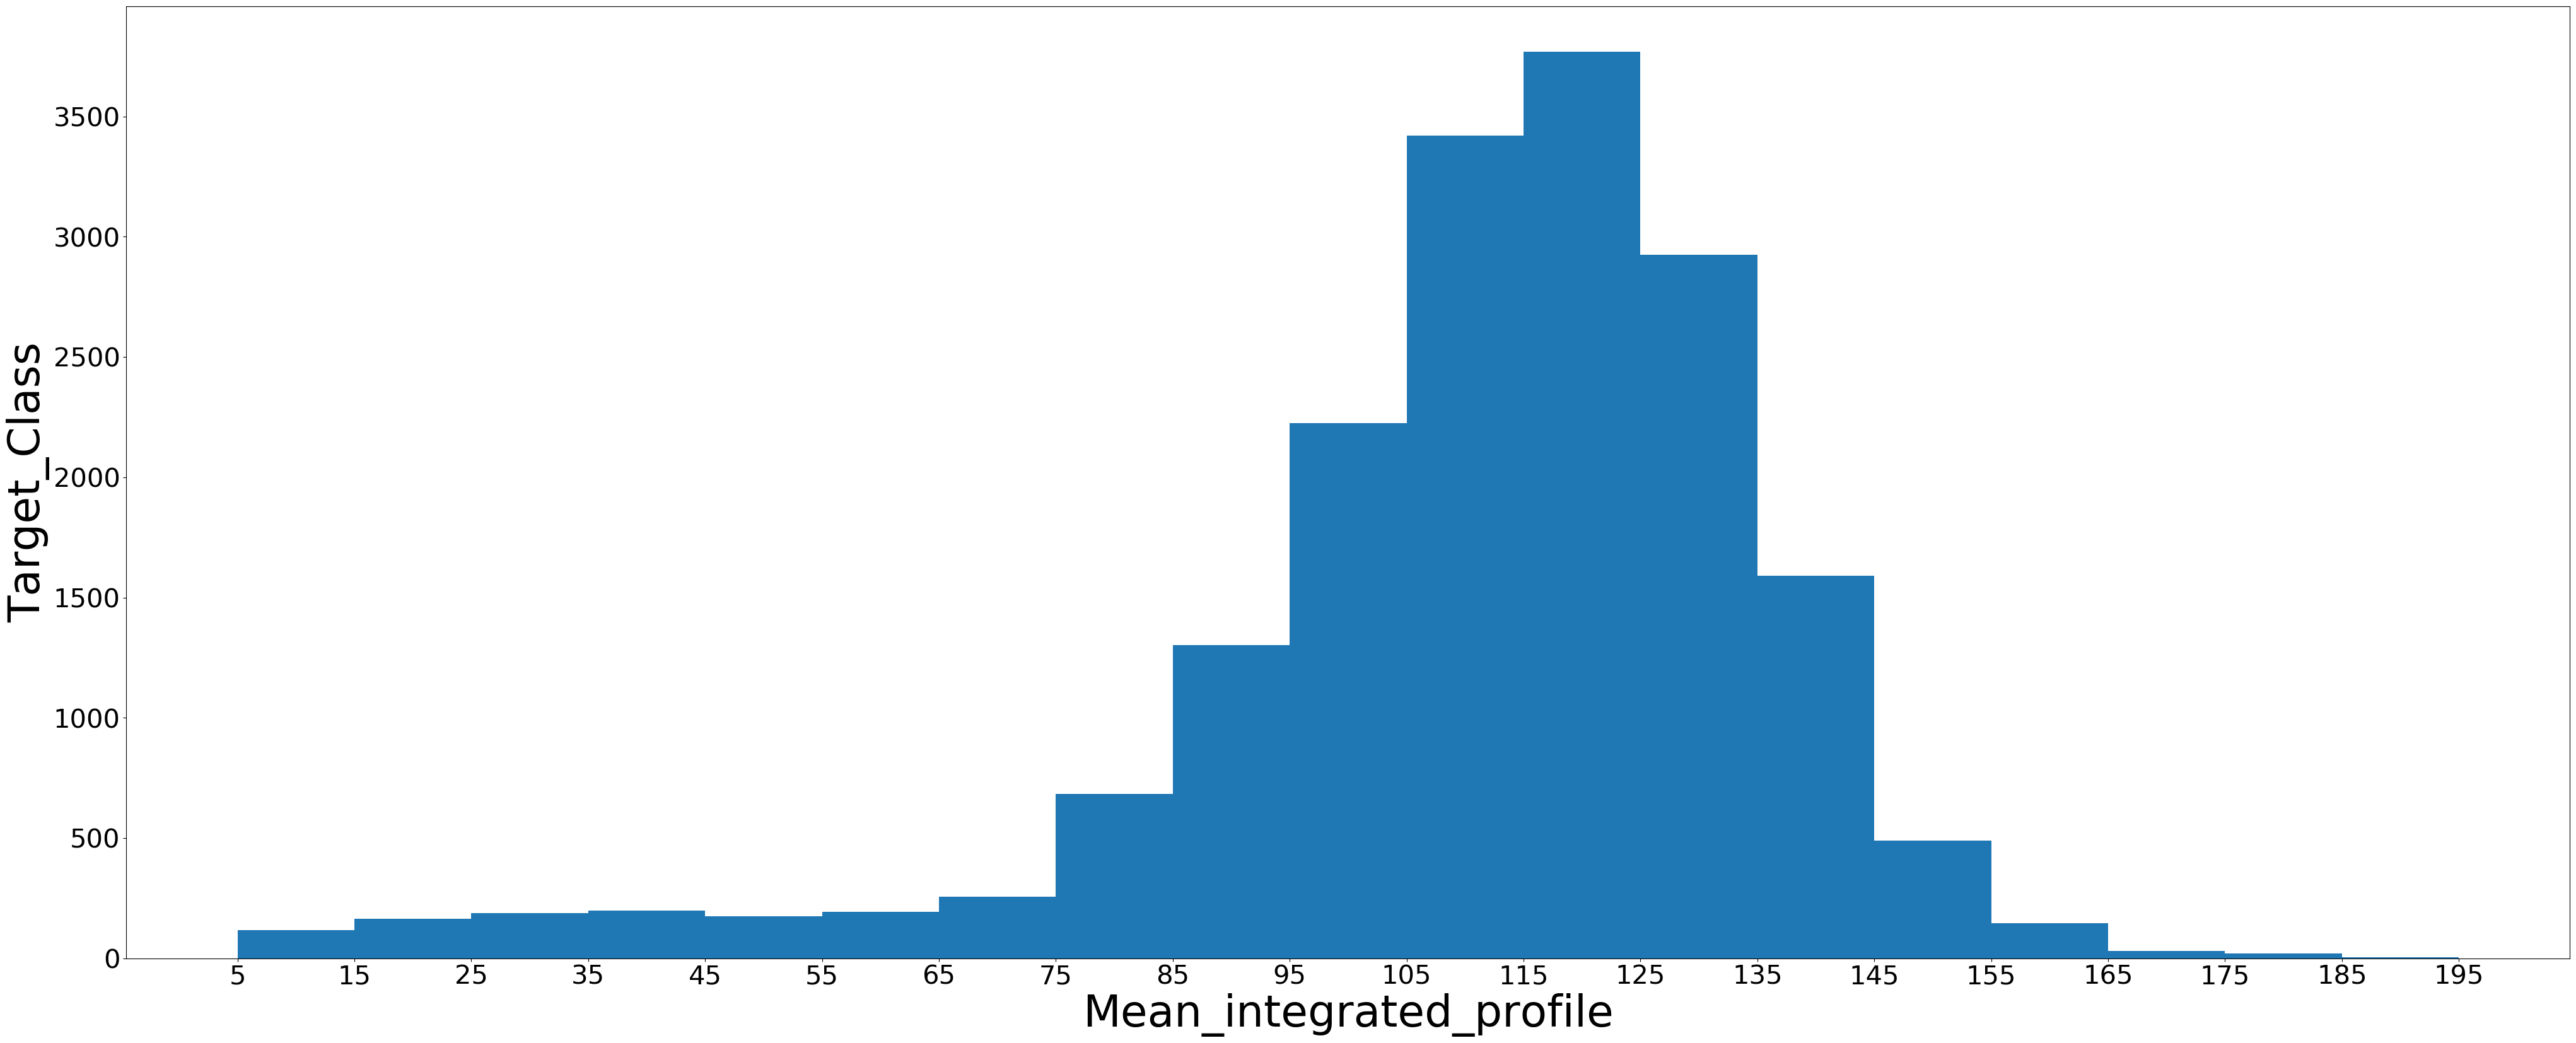

In [21]:
#Trying to plot 'mean of integrated profiles' ranges against average 'target classes' (done in the following cells)
plt.figure(figsize=(50, 20), dpi=100) 
bins = list(range(5, 196, 10))
ticks = []
for i in range(len(bins)-1):
    ticks.append(str(bins[i])+ "<" + str(bins[i+1]))
ticks

plt.hist(list(df['Mean_integrated_profile']), bins=bins)
plt.xlabel("Mean_integrated_profile", fontsize=50)
plt.ylabel("Target_Class", fontsize=50)
plt.xticks(bins, fontsize=30)
plt.yticks(fontsize=30)
plt.show()

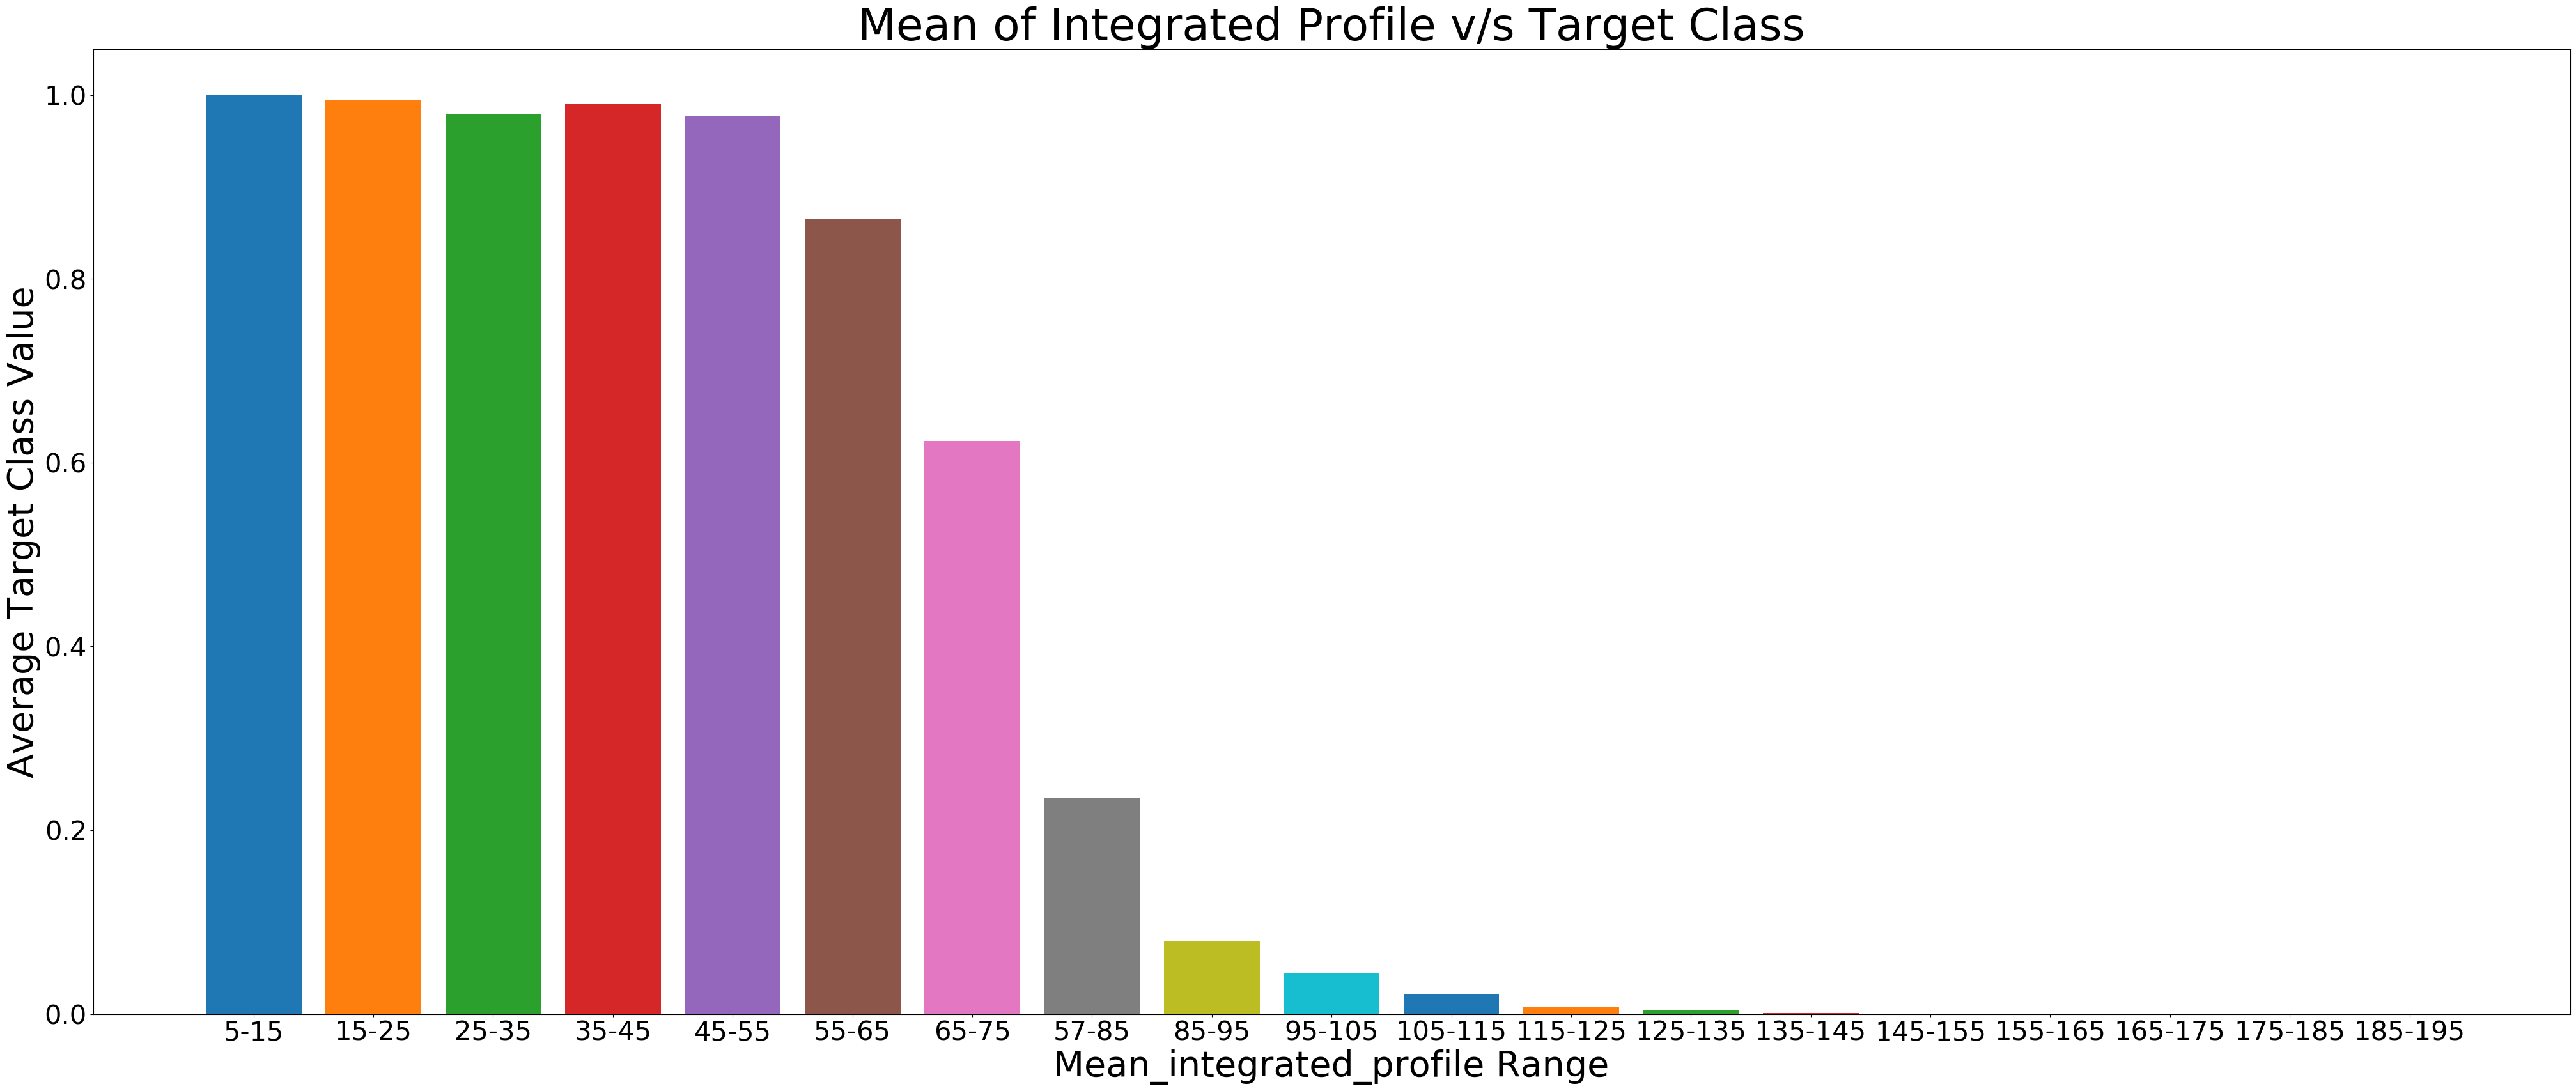

In [22]:
#Plotting 'mean of integrated profiles' ranges against average 'target classes'
plt.figure(figsize=(50, 20), dpi=100)

plt.bar("5-15", df.loc[(df['Mean_integrated_profile']>=5) & (df['Mean_integrated_profile']<15)]['target_class'].mean())
plt.bar("15-25", df.loc[(df['Mean_integrated_profile']>=15) & (df['Mean_integrated_profile']<25)]['target_class'].mean())
plt.bar("25-35", df.loc[(df['Mean_integrated_profile']>=25) & (df['Mean_integrated_profile']<35)]['target_class'].mean())
plt.bar("35-45", df.loc[(df['Mean_integrated_profile']>=35) & (df['Mean_integrated_profile']<45)]['target_class'].mean())
plt.bar("45-55", df.loc[(df['Mean_integrated_profile']>=45) & (df['Mean_integrated_profile']<55)]['target_class'].mean())
plt.bar("55-65", df.loc[(df['Mean_integrated_profile']>=55) & (df['Mean_integrated_profile']<65)]['target_class'].mean())
plt.bar("65-75", df.loc[(df['Mean_integrated_profile']>=65) & (df['Mean_integrated_profile']<75)]['target_class'].mean())
plt.bar("57-85", df.loc[(df['Mean_integrated_profile']>=75) & (df['Mean_integrated_profile']<85)]['target_class'].mean())
plt.bar("85-95", df.loc[(df['Mean_integrated_profile']>=85) & (df['Mean_integrated_profile']<95)]['target_class'].mean())
plt.bar("95-105", df.loc[(df['Mean_integrated_profile']>=95) & (df['Mean_integrated_profile']<105)]['target_class'].mean())
plt.bar("105-115", df.loc[(df['Mean_integrated_profile']>=105) & (df['Mean_integrated_profile']<115)]['target_class'].mean())
plt.bar("115-125", df.loc[(df['Mean_integrated_profile']>=115) & (df['Mean_integrated_profile']<125)]['target_class'].mean())
plt.bar("125-135", df.loc[(df['Mean_integrated_profile']>=125) & (df['Mean_integrated_profile']<135)]['target_class'].mean())
plt.bar("135-145", df.loc[(df['Mean_integrated_profile']>=135) & (df['Mean_integrated_profile']<145)]['target_class'].mean())
plt.bar("145-155", df.loc[(df['Mean_integrated_profile']>=145) & (df['Mean_integrated_profile']<155)]['target_class'].mean())
plt.bar("155-165", df.loc[(df['Mean_integrated_profile']>=155) & (df['Mean_integrated_profile']<165)]['target_class'].mean())
plt.bar("165-175", df.loc[(df['Mean_integrated_profile']>=165) & (df['Mean_integrated_profile']<175)]['target_class'].mean())
plt.bar("175-185", df.loc[(df['Mean_integrated_profile']>=175) & (df['Mean_integrated_profile']<185)]['target_class'].mean())
plt.bar("185-195", df.loc[(df['Mean_integrated_profile']>=185) & (df['Mean_integrated_profile']<195)]['target_class'].mean())

plt.xticks(fontsize=30)
plt.yticks(fontsize=30)
plt.xlabel("Mean_integrated_profile Range", fontsize=40)
plt.ylabel("Average Target Class Value", fontsize=40)

plt.title("Mean of Integrated Profile v/s Target Class", fontsize=50)
plt.show()

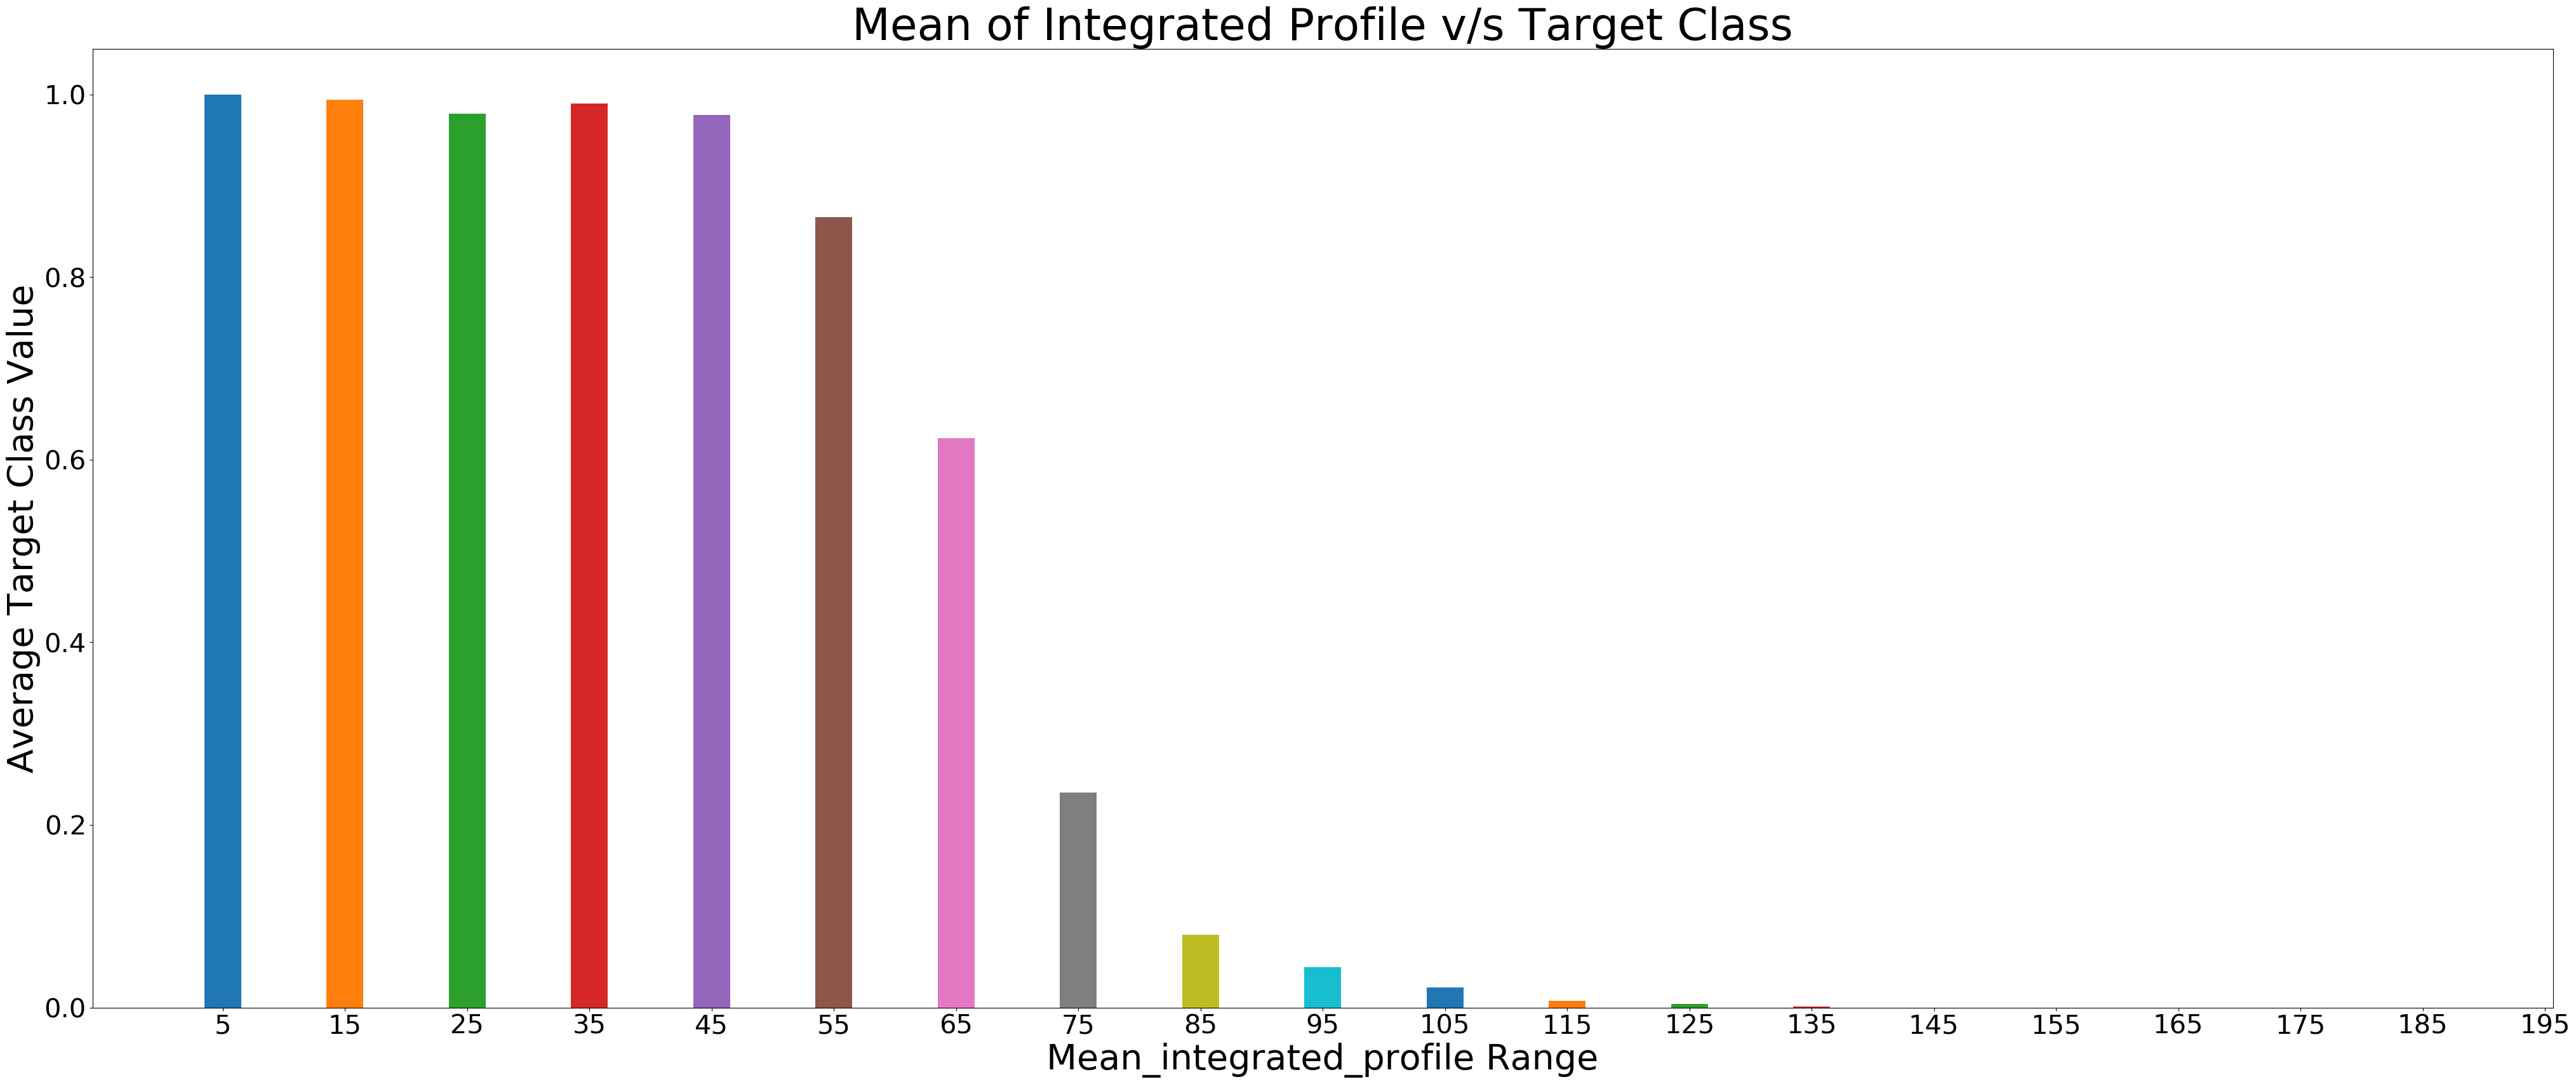

In [23]:
#Condensed version of above chart

plt.figure(figsize=(50, 20), dpi=100)

for i in range(len(bins)-1):
    plt.bar(bins[i], df.loc[(df['Mean_integrated_profile']>=bins[i]) & (df['Mean_integrated_profile']<bins[i+1])]['target_class'].mean(), width=3)
    
plt.xticks(bins, fontsize=30)
plt.yticks(fontsize=30)
plt.xlabel("Mean_integrated_profile Range", fontsize=40)
plt.ylabel("Average Target Class Value", fontsize=40)

plt.title("Mean of Integrated Profile v/s Target Class", fontsize=50)
plt.show()

In [24]:
ticks = []
for i in range(len(bins)-1):
    ticks.append(str(bins[i])+ "<" + str(bins[i+1]))
ticks

#However, creating this list doesn't help as it can't be converted into axis units

['5<15',
 '15<25',
 '25<35',
 '35<45',
 '45<55',
 '55<65',
 '65<75',
 '75<85',
 '85<95',
 '95<105',
 '105<115',
 '115<125',
 '125<135',
 '135<145',
 '145<155',
 '155<165',
 '165<175',
 '175<185',
 '185<195']

In [25]:
df['Standard_deviation_integrated_profile'].min()    #24.77204176
df['Standard_deviation_integrated_profile'].max()    #98.77891067

98.77891067

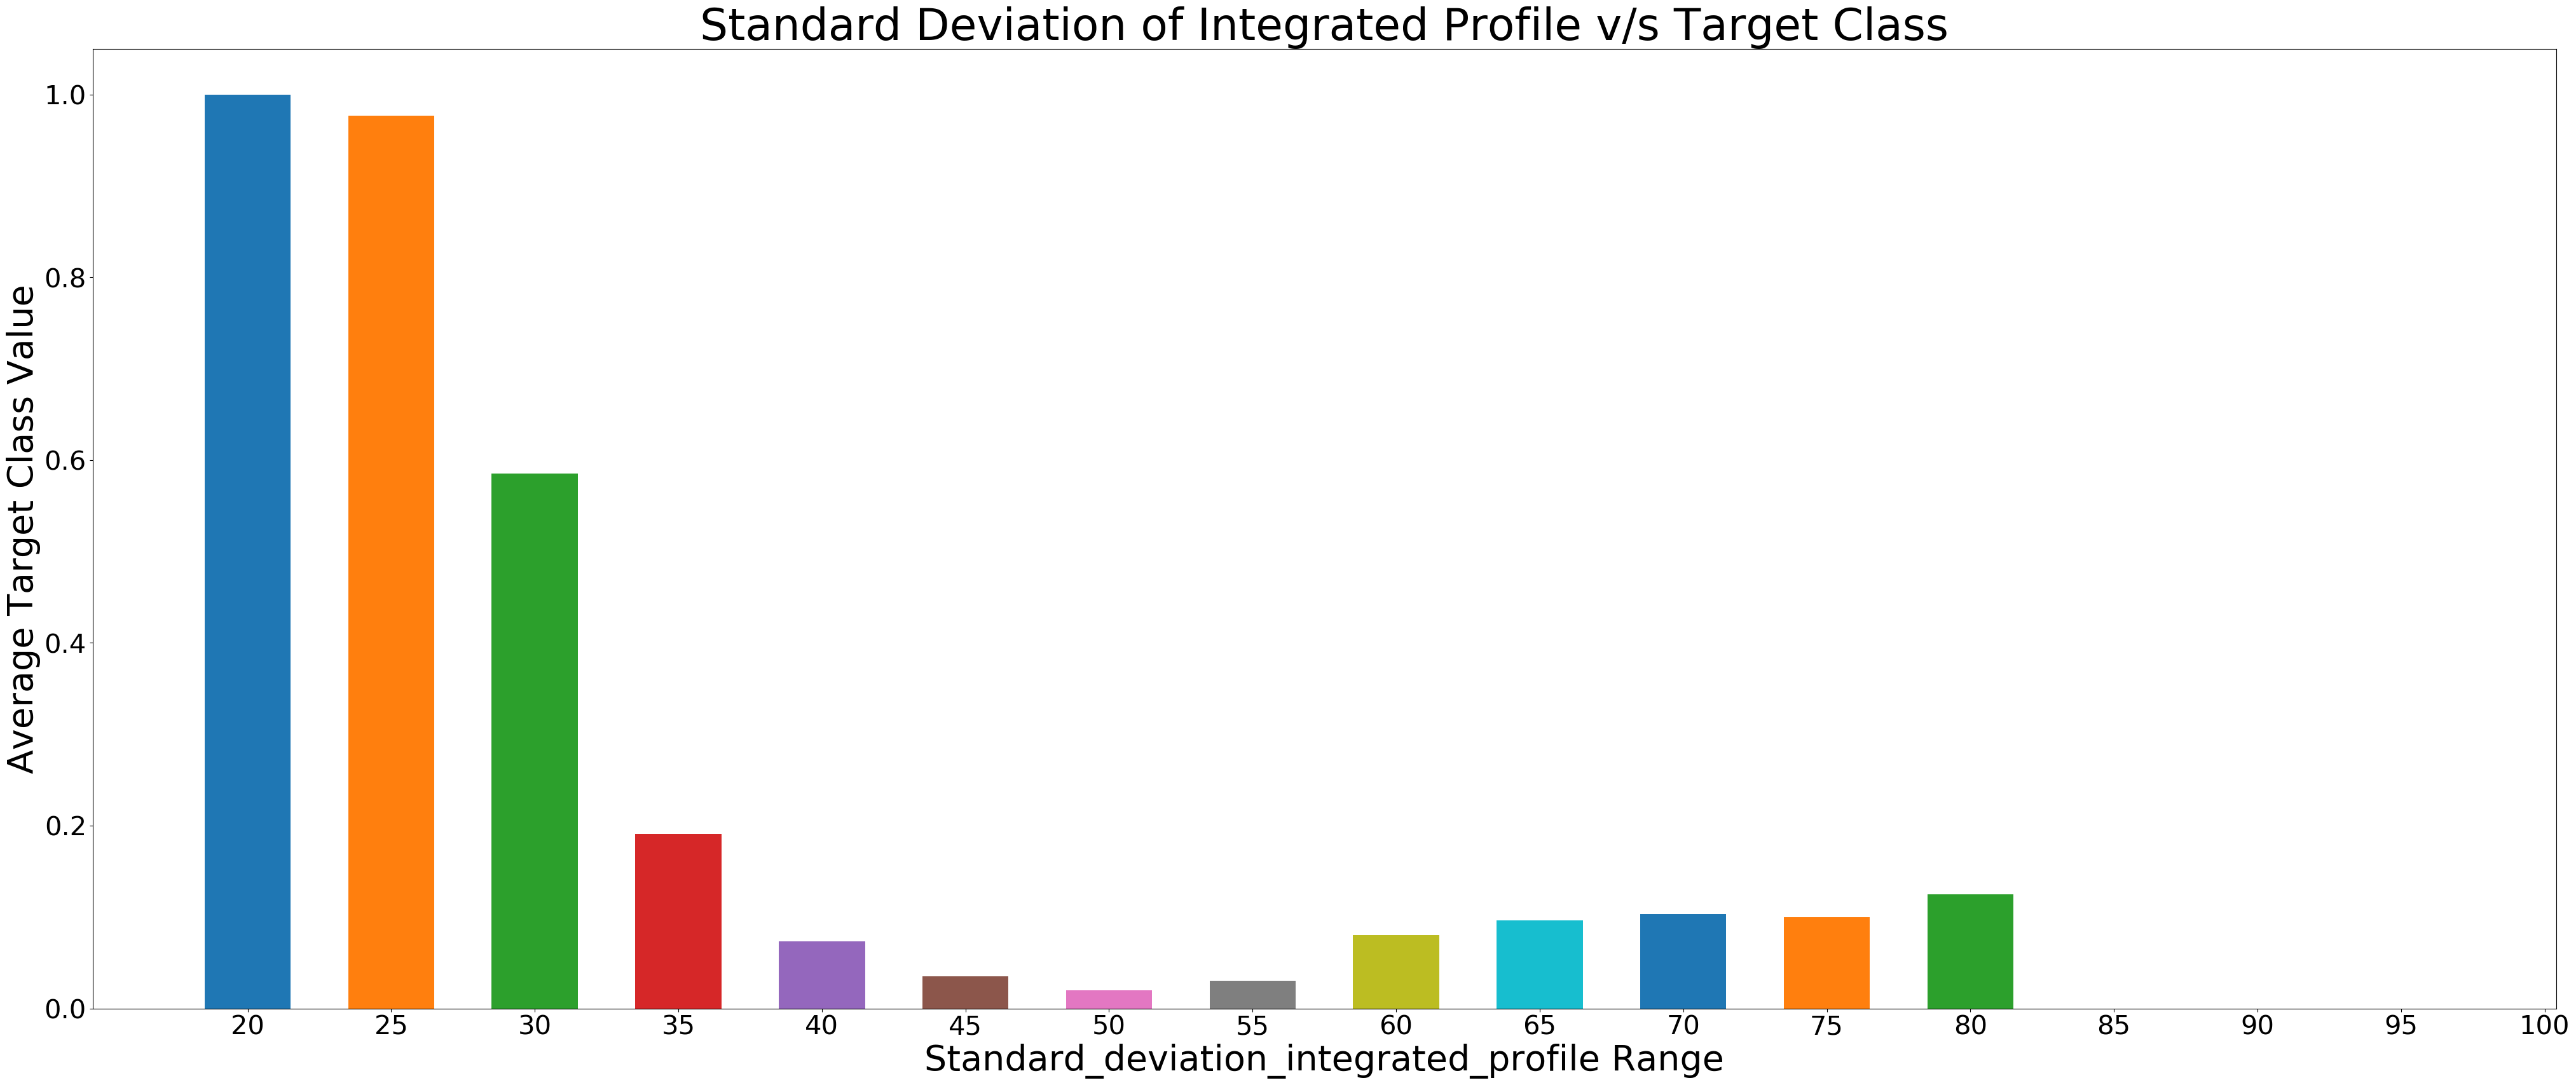

In [26]:
#Plotting 'Standard_deviation_integrated_profile' ranges against average 'target classes'
bins = list(range(20, 105, 5))

plt.figure(figsize=(50, 20), dpi=100)

for i in range(len(bins)-1):
    plt.bar(bins[i], df.loc[(df['Standard_deviation_integrated_profile']>=bins[i]) & (df['Standard_deviation_integrated_profile']<bins[i+1])]['target_class'].mean(), width=3)
    #Tried substituting bins with ticks but the bars started to overlap
    
plt.xticks(bins, fontsize=30)
plt.yticks(fontsize=30)
plt.xlabel("Standard_deviation_integrated_profile Range", fontsize=40)
plt.ylabel("Average Target Class Value", fontsize=40)

plt.title("Standard Deviation of Integrated Profile v/s Target Class", fontsize=50)
plt.show()

In [27]:
print (df['Excess_kurtosis_integrated_profile'].min())    #-1.876011181
print (df['Excess_kurtosis_integrated_profile'].max())    #8.069522046

-1.876011181
8.069522046


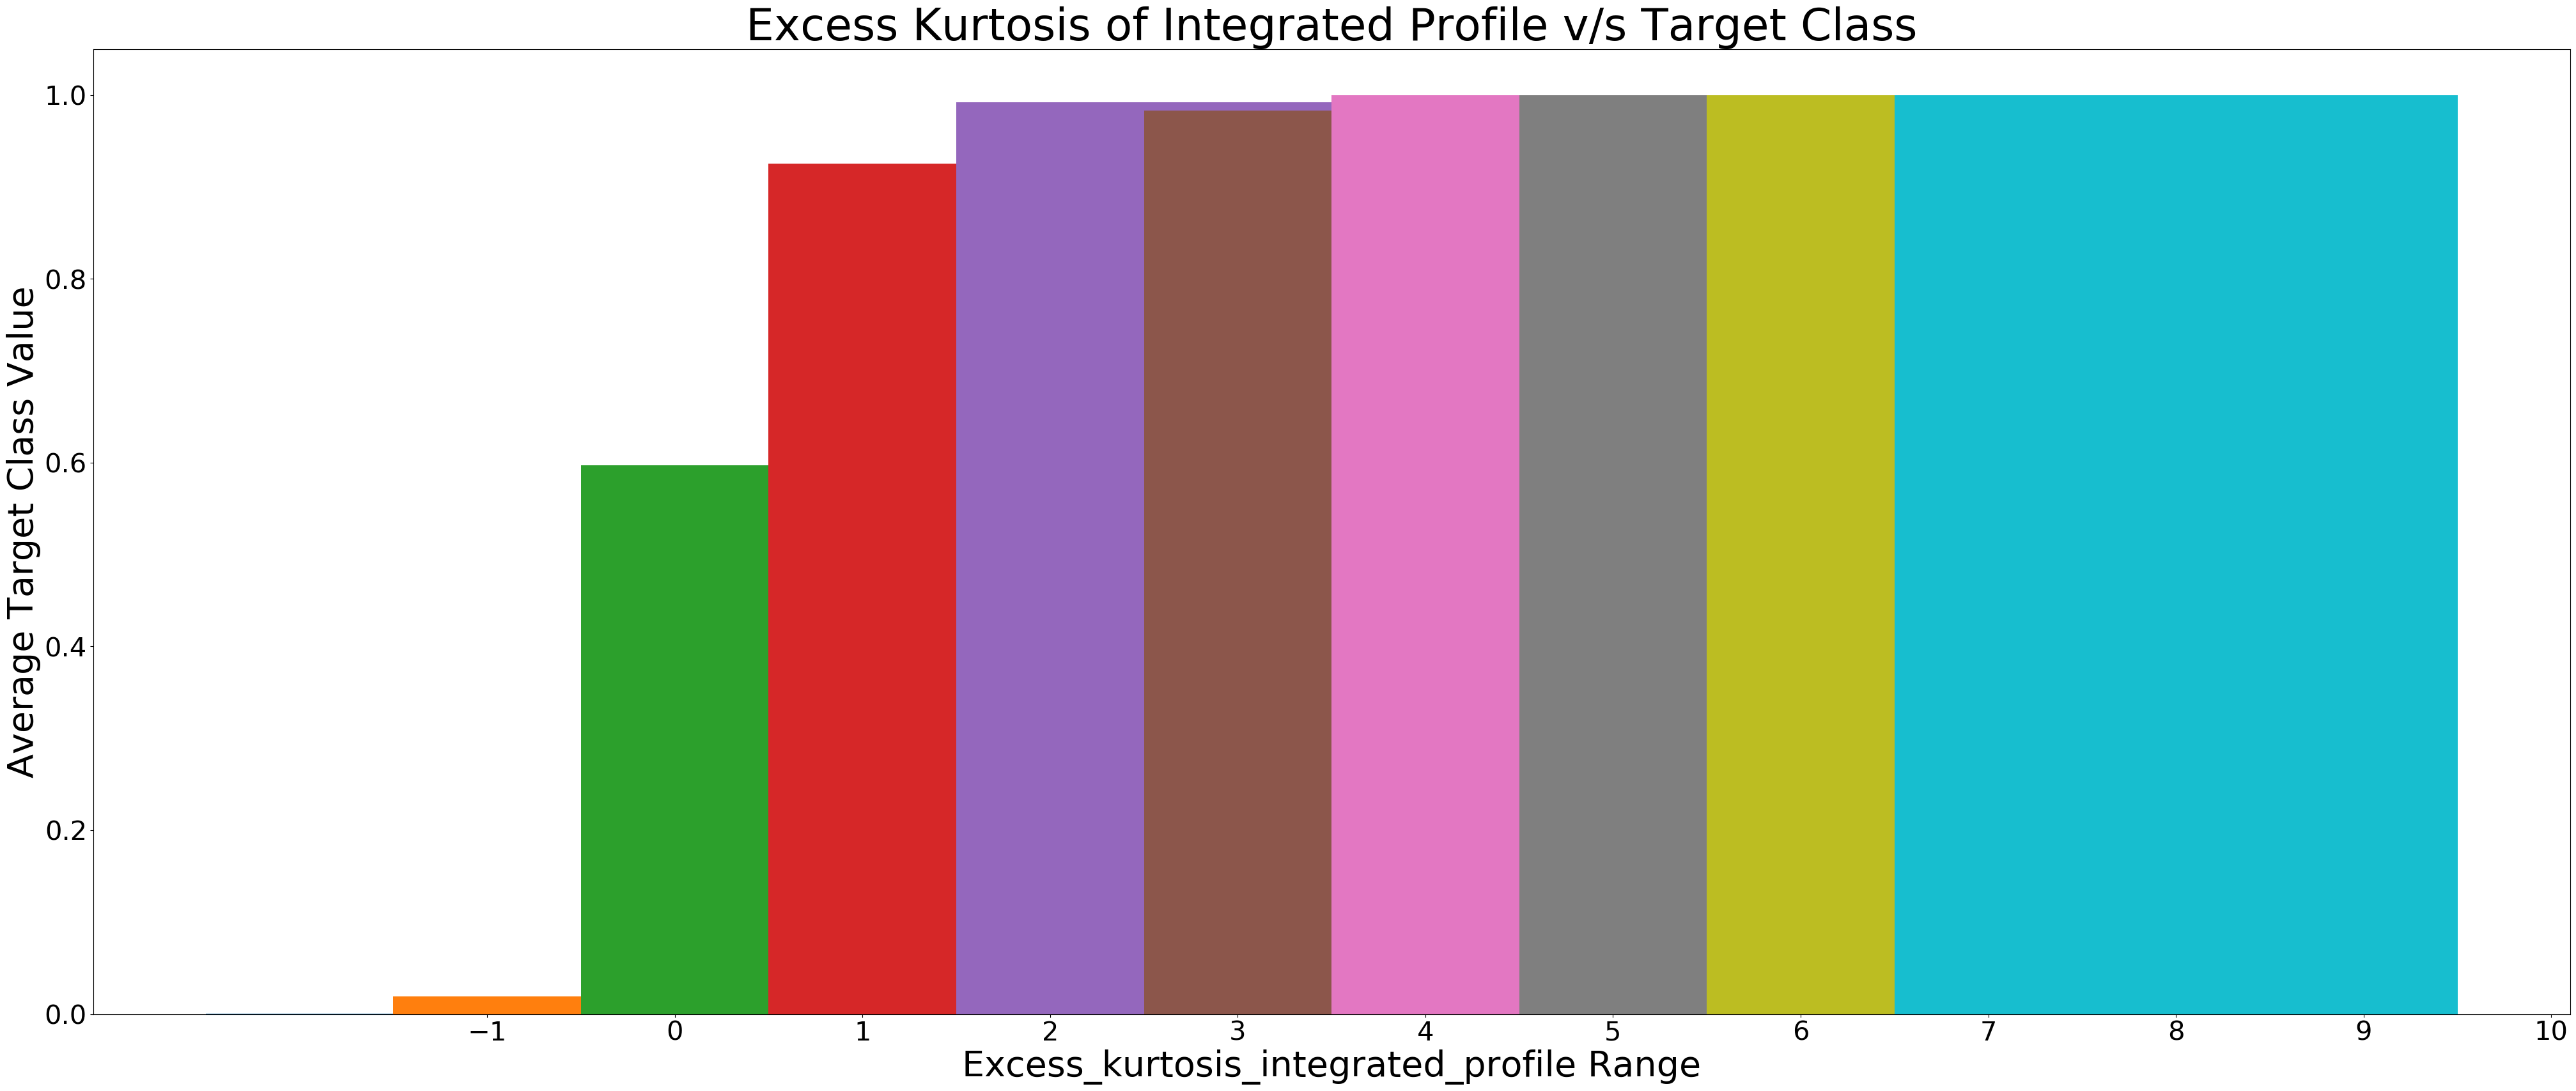

In [28]:
#Plotting 'Excess_kurtosis_integrated_profile' ranges against average 'target classes'
bins = list(range(-1, 11, 1))

plt.figure(figsize=(50, 20), dpi=100)

for i in range(len(bins)-1):
    plt.bar(bins[i], df.loc[(df['Excess_kurtosis_integrated_profile']>=bins[i]) & (df['Excess_kurtosis_integrated_profile']<bins[i+1])]['target_class'].mean(), width=3)
    #Tried substituting bins with ticks but the bars started to overlap
    
plt.xticks(bins, fontsize=30)
plt.yticks(fontsize=30)
plt.xlabel("Excess_kurtosis_integrated_profile Range", fontsize=40)
plt.ylabel("Average Target Class Value", fontsize=40)

plt.title("Excess Kurtosis of Integrated Profile v/s Target Class", fontsize=50)
plt.show()

In [29]:
print (df['Skewness_integrated_profile'].min())    #-1.7918859809999999
print (df['Skewness_integrated_profile'].max())    #68.10162173

-1.7918859809999999
68.10162173


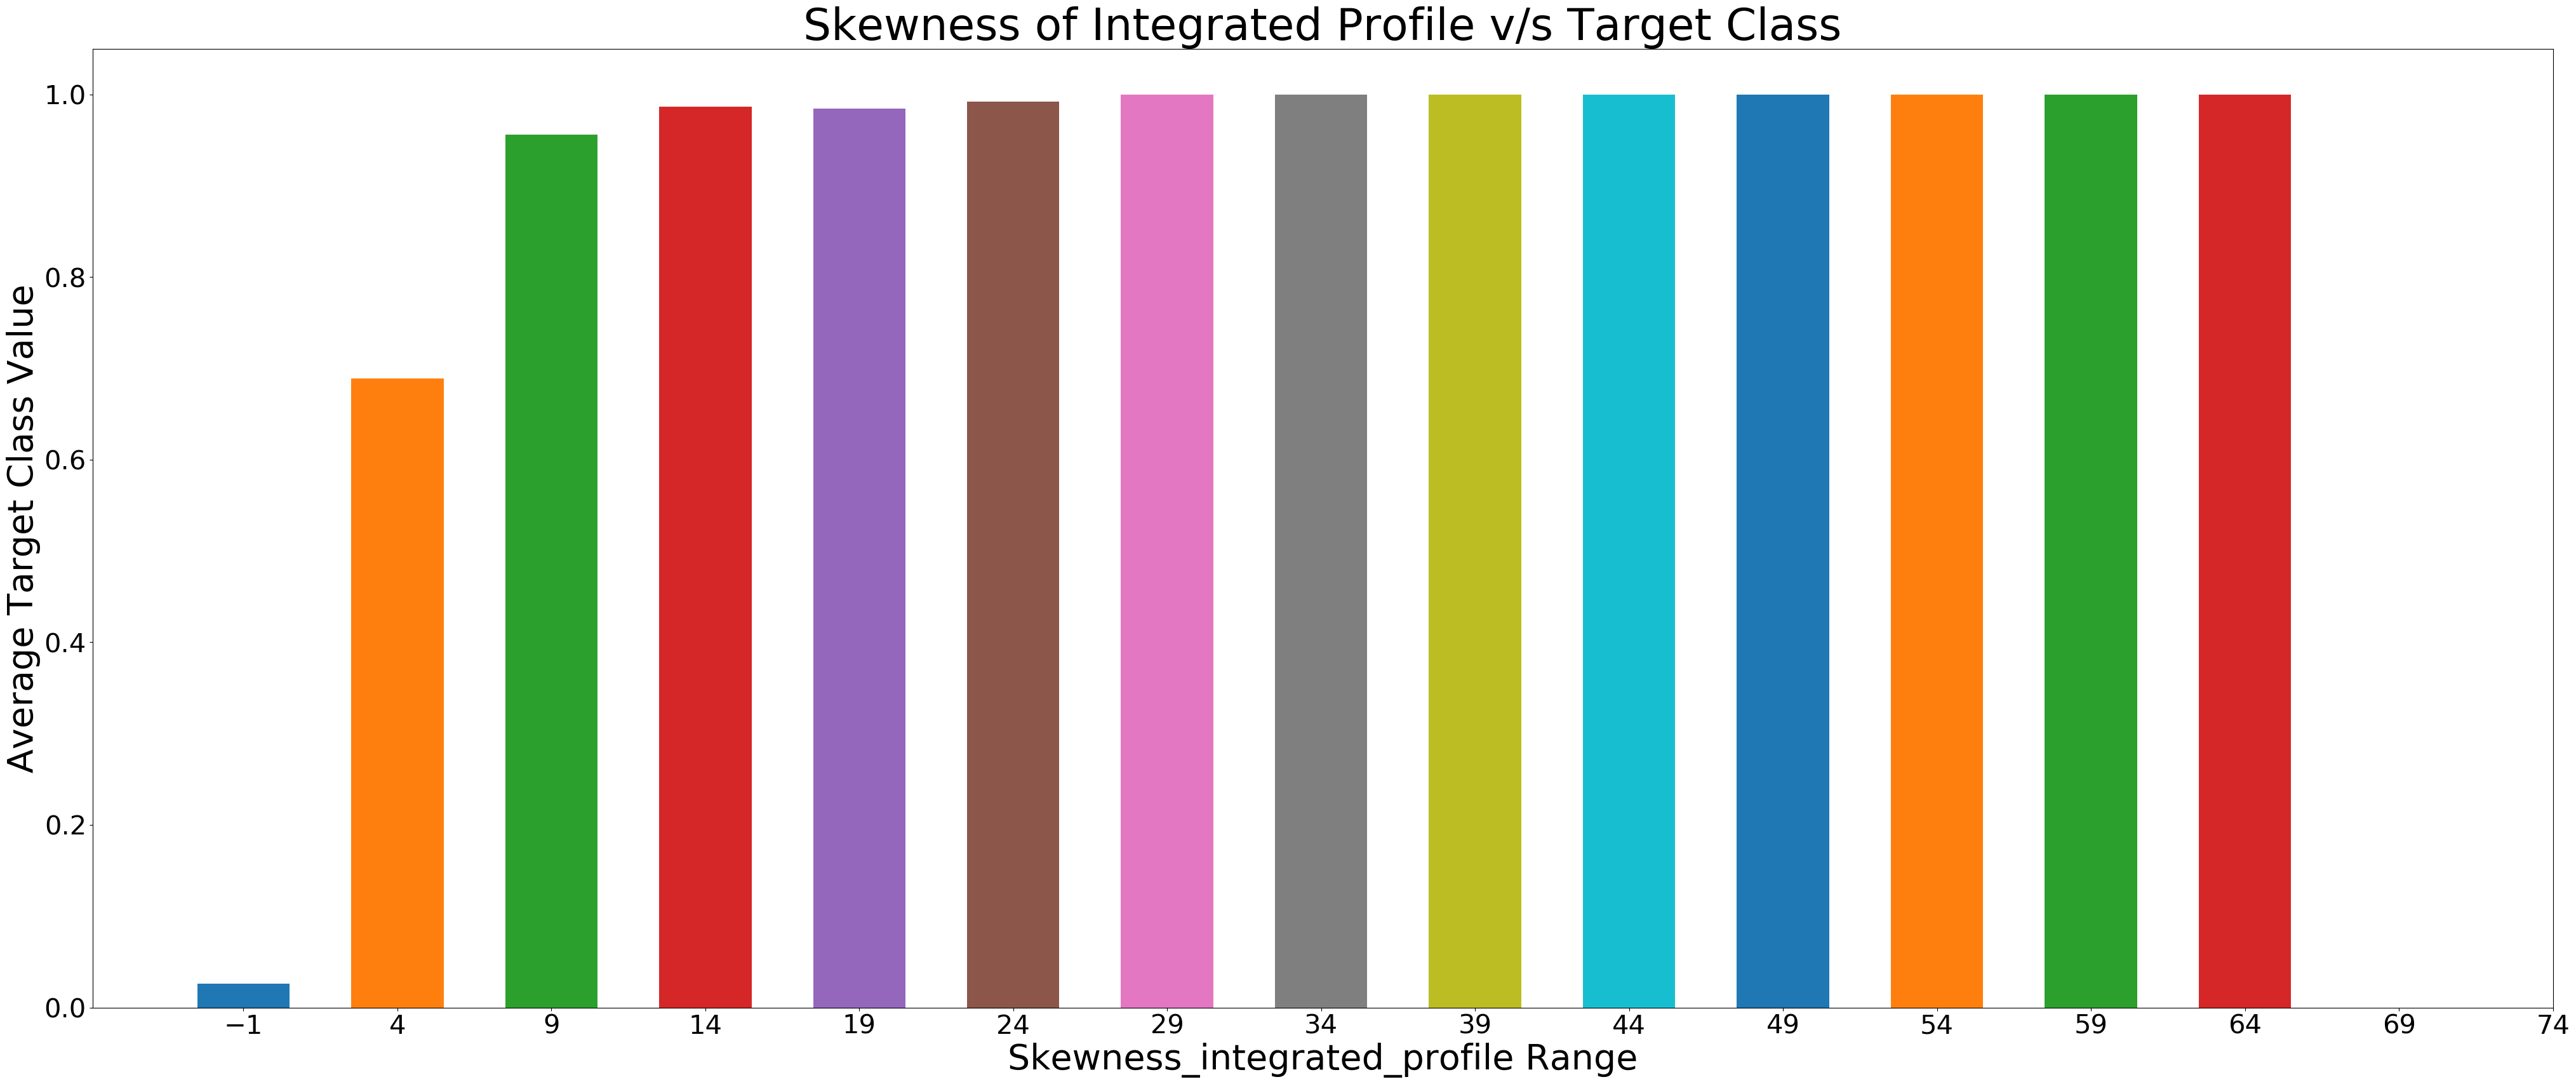

In [30]:
#Plotting 'Skewness_integrated_profile' ranges against average 'target classes'
bins = list(range(-1, 75, 5))

plt.figure(figsize=(50, 20), dpi=100)

for i in range(len(bins)-1):
    plt.bar(bins[i], df.loc[(df['Skewness_integrated_profile']>=bins[i]) & (df['Skewness_integrated_profile']<bins[i+1])]['target_class'].mean(), width=3)
    #Tried substituting bins with ticks but the bars started to overlap
    
plt.xticks(bins, fontsize=30)
plt.yticks(fontsize=30)
plt.xlabel("Skewness_integrated_profile Range", fontsize=40)
plt.ylabel("Average Target Class Value", fontsize=40)

plt.title("Skewness of Integrated Profile v/s Target Class", fontsize=50)
plt.show()

In [31]:
print (df['Mean_DM_SNR_curve'].min())    #0.213210702
print (df['Mean_DM_SNR_curve'].max())    #223.39214049999998

0.213210702
223.39214049999998


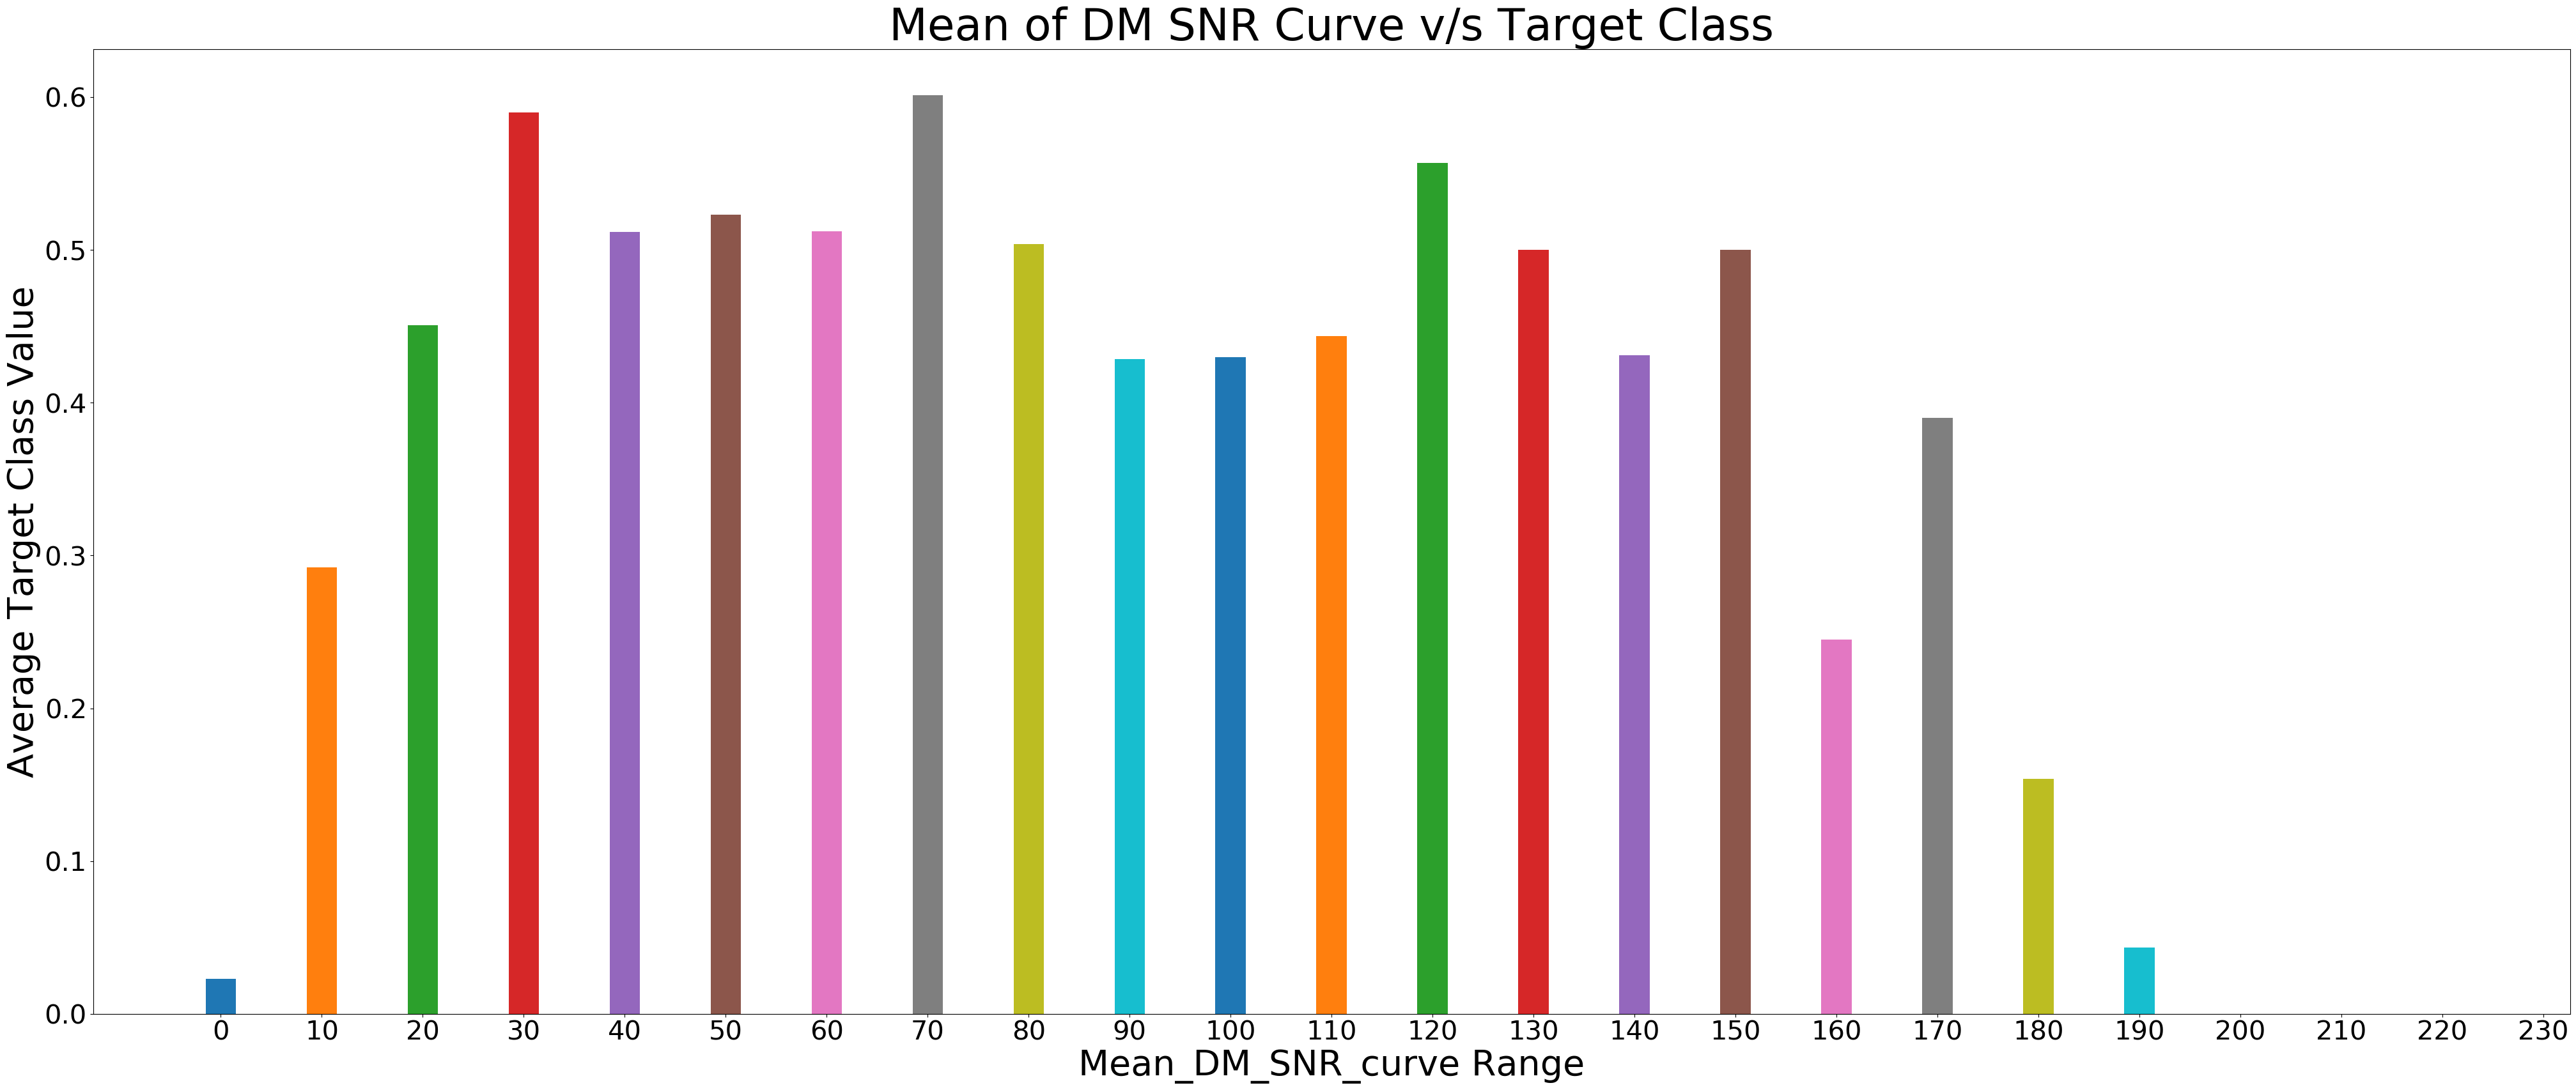

In [32]:
#Plotting 'Mean_DM_SNR_curve' ranges against average 'target classes'
bins = list(range(0, 240, 10))

plt.figure(figsize=(50, 20), dpi=100)

for i in range(len(bins)-1):
    plt.bar(bins[i], df.loc[(df['Mean_DM_SNR_curve']>=bins[i]) & (df['Mean_DM_SNR_curve']<bins[i+1])]['target_class'].mean(), width=3)
    #Tried substituting bins with ticks but the bars started to overlap
    
plt.xticks(bins, fontsize=30)
plt.yticks(fontsize=30)
plt.xlabel("Mean_DM_SNR_curve Range", fontsize=40)
plt.ylabel("Average Target Class Value", fontsize=40)

plt.title("Mean of DM SNR Curve v/s Target Class", fontsize=50)
plt.show()

In [33]:
print (df['Standard_deviation_DM_SNR_curve'].min())    #7.370432165
print (df['Standard_deviation_DM_SNR_curve'].max())    #110.64221059999998

7.370432165
110.64221059999998


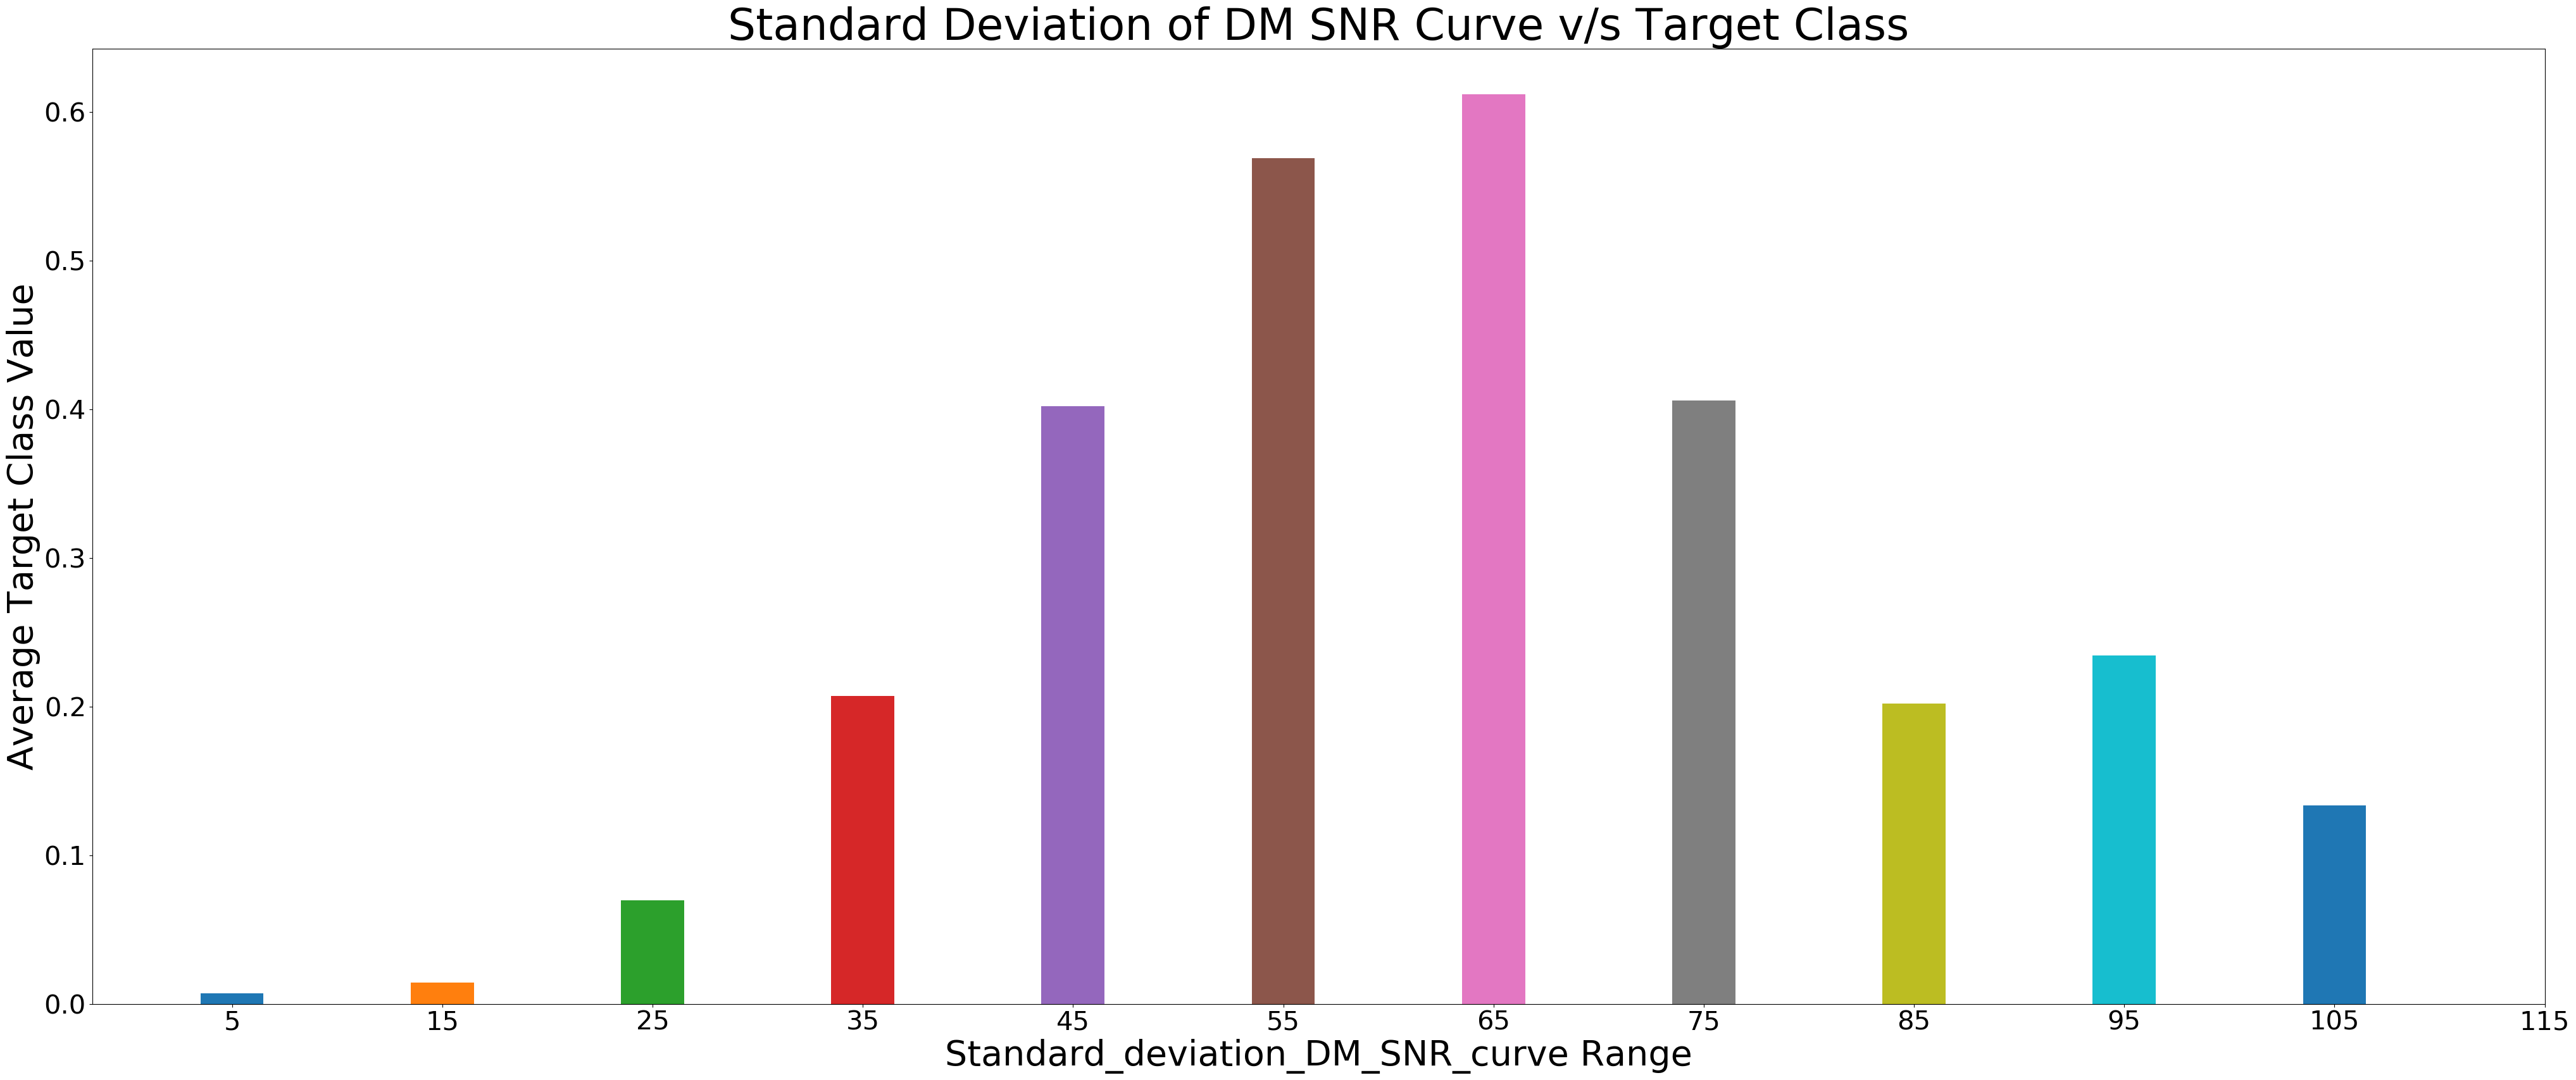

In [34]:
#Plotting '	Standard_deviation_DM_SNR_curve' ranges against average 'target classes'
bins = list(range(5, 120, 10))

plt.figure(figsize=(50, 20), dpi=100)

for i in range(len(bins)-1):
    plt.bar(bins[i], df.loc[(df['Standard_deviation_DM_SNR_curve']>=bins[i]) & (df['Standard_deviation_DM_SNR_curve']<bins[i+1])]['target_class'].mean(), width=3)
    #Tried substituting bins with ticks but the bars started to overlap
    
plt.xticks(bins, fontsize=30)
plt.yticks(fontsize=30)
plt.xlabel("Standard_deviation_DM_SNR_curve Range", fontsize=40)
plt.ylabel("Average Target Class Value", fontsize=40)

plt.title("Standard Deviation of DM SNR Curve v/s Target Class", fontsize=50)
plt.show()

In [35]:
print (df[' Excess_kurtosis_DM_SNR_curve'].min())    #-3.1392696110000005
print (df[' Excess_kurtosis_DM_SNR_curve'].max())    #34.53984419

-3.1392696110000005
34.53984419


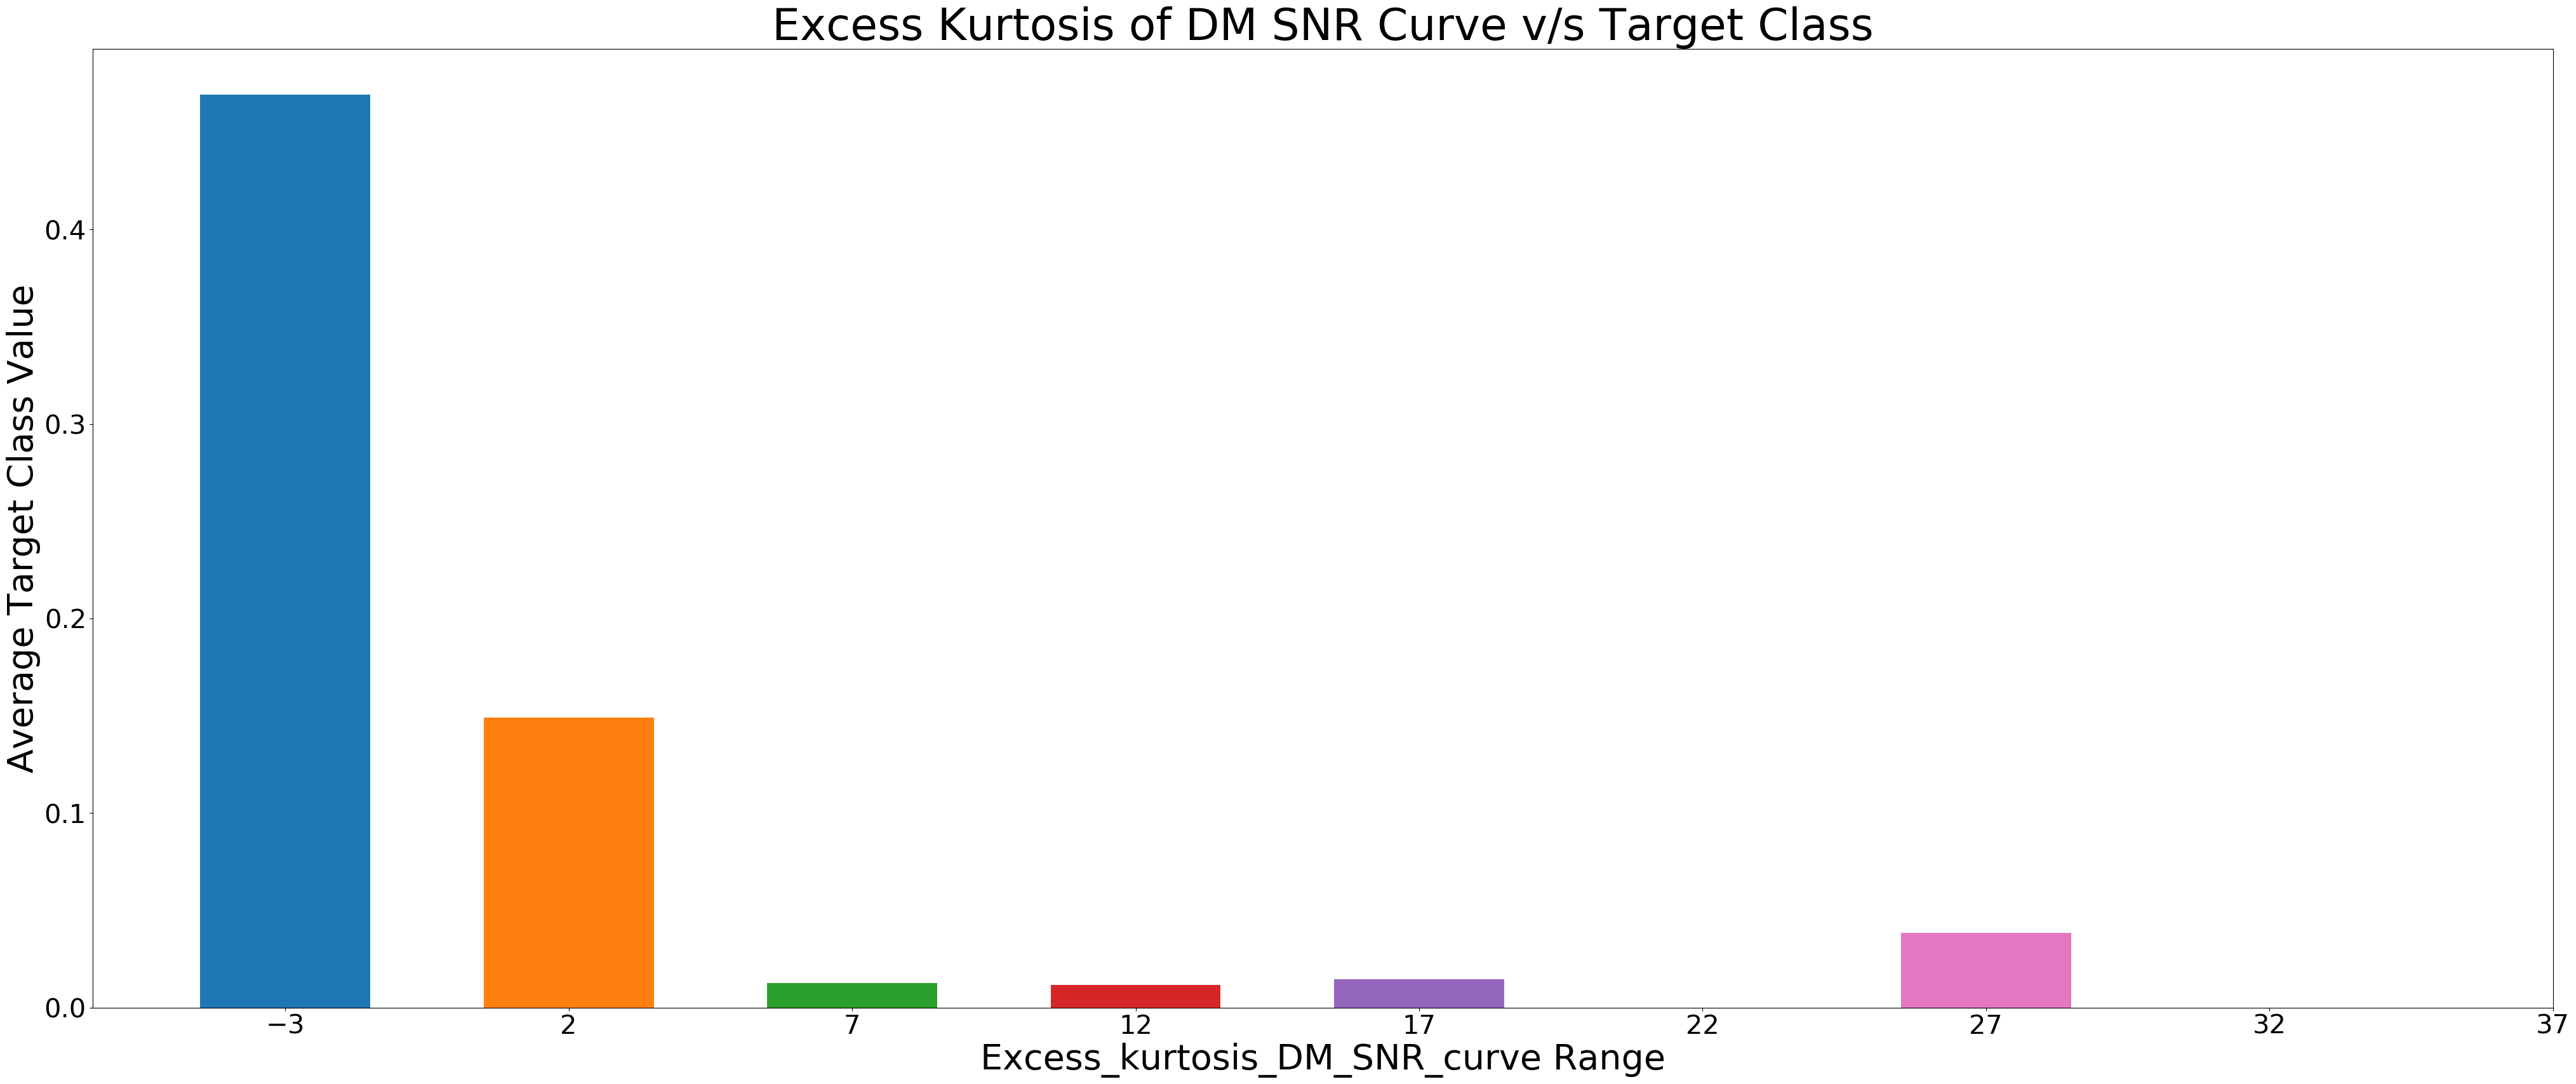

In [36]:
#Plotting 'Excess_kurtosis_DM_SNR_curve' ranges against average 'target classes'
bins = list(range(-3, 40, 5))

plt.figure(figsize=(50, 20), dpi=100)

for i in range(len(bins)-1):
    plt.bar(bins[i], df.loc[(df[' Excess_kurtosis_DM_SNR_curve']>=bins[i]) & (df[' Excess_kurtosis_DM_SNR_curve']<bins[i+1])]['target_class'].mean(), width=3)
    #Tried substituting bins with ticks but the bars started to overlap
    
plt.xticks(bins, fontsize=30)
plt.yticks(fontsize=30)
plt.xlabel("Excess_kurtosis_DM_SNR_curve Range", fontsize=40)
plt.ylabel("Average Target Class Value", fontsize=40)

plt.title("Excess Kurtosis of DM SNR Curve v/s Target Class", fontsize=50)
plt.show()

In [37]:
print (df[' Skewness_DM_SNR_curve'].min())    #-1.7918859809999999
print (df[' Skewness_DM_SNR_curve'].max())    #68.10162173

-1.976975603
1191.0008369999998


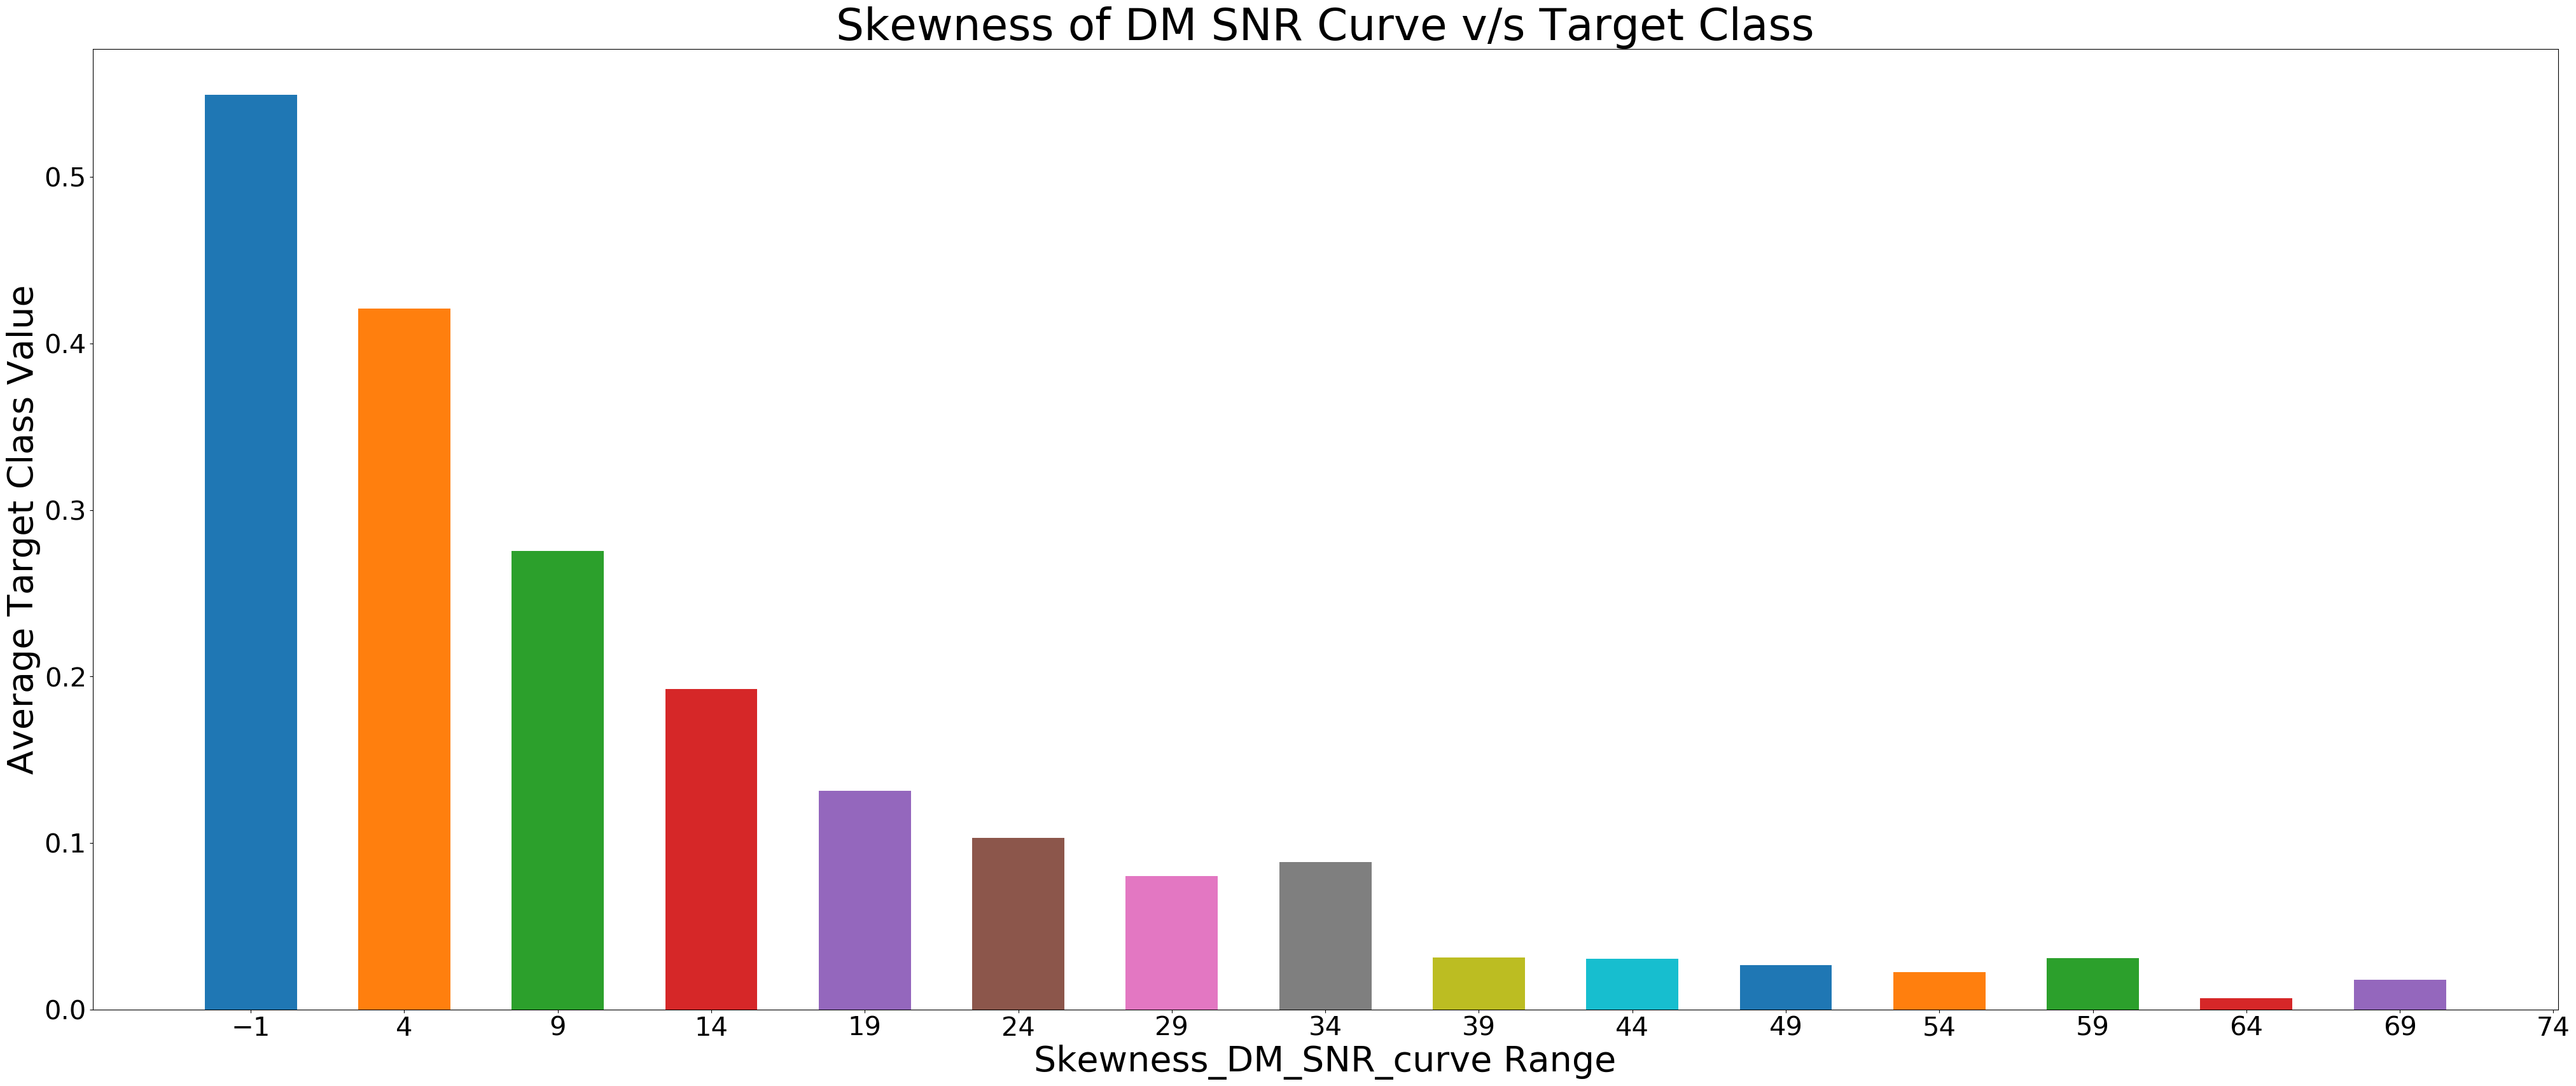

In [38]:
#Plotting 'Skewness_DM_SNR_curve' ranges against average 'target classes'
bins = list(range(-1, 75, 5))

plt.figure(figsize=(50, 20), dpi=100)

for i in range(len(bins)-1):
    plt.bar(bins[i], df.loc[(df[' Skewness_DM_SNR_curve']>=bins[i]) & (df[' Skewness_DM_SNR_curve']<bins[i+1])]['target_class'].mean(), width=3)
    #Tried substituting bins with ticks but the bars started to overlap
    
plt.xticks(bins, fontsize=30)
plt.yticks(fontsize=30)
plt.xlabel("Skewness_DM_SNR_curve Range", fontsize=40)
plt.ylabel("Average Target Class Value", fontsize=40)

plt.title("Skewness of DM SNR Curve v/s Target Class", fontsize=50)
plt.show()